<h3 style = "color: blue"><strong><center> PAPER 1 : LIVER FUNCTION TEST</strong></h3>

<h1><strong><center>Analyzing the salient features of LFT and classification of chronic liver disease patients of the basis of the features of those LFT's, through various Neural Network , Support Vector Machines and XGboost Classification Algorithms</strong></h1>

<h1><strong><span style = "color: orange">Contents</span><strong></h1>

* [Import Libraries](#1)
* [Data Collection and Helper Functions](#2)
* [Exploratory Data Analysis](#3)
    * [Univariate Statistical Analysis](#31)
        * [Percentage of null values](#311)
        * [Data Description - kurt, skew, sd, mean, etc](#312)
        * [Data Distribution](#313)
        * [Inference](#314)
    * [Bivariate Statistical Analysis](#32)
        * [Correlation Matrix](#321)
        * [Correlation with output label](#322)
        * [t-value and pearson correlation](#323)
        * [fitting regression line to check correlation](#324)
        * [Inference](#325)
* [Categorical Features](#4)
* [Outliers](#5)
    * [Inference](#51)
* [Data Preprocessing](#6)
    * [Label Encoder](#61)
    * [Handling the null values](#62)
    * [Feature and output label segregation](#63)
* [Correcting Imabalanced Dataset](#7)
    * [Upsampling Dataset](#71)
* [Feature Selection](#8)
* [Feature Scaling](#9)
    * [Standard Scaler](#91)
* [Train Test Validation Set Split](#10)
* [Machine Learning Models](#11)
    * [Support Vector Machines](#111)
        * [linear SVM](#1111)
        * [quadratic SVM](#1112)
        * [cubic SVM](#1113)
        * [fine gaussian SVM](#1114)
        * [medium gaussian SVM](#1115)
        * [coarse gaussian SVM](#1116)
    * [Neural Networks](#112)
        * [narrow NN](#1121)
        * [medium NN](#1122)
        * [wide NN](#1123)
        * [tri layered NN](#1124)
        * [four layered narrow NN](#1125)
        * [four layered wide NN](#1126)
        * [six layered NN](#1127)
* [Comparative Summary](#12)

# Import Libraries <a class="anchor" id="1"></a>

In [1]:
import pickle
import numpy as np 
import pandas as pd 
import tensorflow as tf 
import xgboost as xgb
import matplotlib.pyplot as plt 
import seaborn as sns  
import time
from scipy import stats
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import NearMiss  
from sklearn.pipeline import make_pipeline 
from sklearn.svm import LinearSVC, SVC 
from sklearn.model_selection import GridSearchCV
from scipy.stats import loguniform, uniform
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import kurtosis, pearsonr

# Data Collection and Helper Functions <a class="anchor" id="2"></a>

In [2]:
pd.pandas.set_option('display.max_columns', None)
data = pd.read_csv("../dataset/LPD_30k.csv", encoding = "unicode_escape")
data.head(10)

,Age,Gender,T_Bil,D_Bil,Alkphos,Sgpt,Sgot,Total_Protiens,Alb,A/G,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
5,46.0,Male,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.30,1
6,26.0,Female,0.9,0.2,154.0,NaN,12.0,7.0,3.5,1.00,1
7,29.0,Female,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,1
8,17.0,Male,0.9,0.3,202.0,22.0,19.0,7.4,4.1,1.20,2
9,55.0,Male,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.00,1


In [3]:
duplicates = data[data.duplicated()]
data.drop_duplicates(inplace=True)

In [4]:
# Removing all the null values 
data = data.dropna()
data.shape

(16389, 11)

In [5]:
data["Result"] = data["Result"] - 1

In [6]:
data.shape

(16389, 11)

In [7]:
def save_model(model, model_name):
    filename = model_name + '.sav'
    pickle.dump(model, open(filename, 'wb'))

# Exploratory Data Analytics <a class="anchor" id="3"></a>

### __Univariate Statistical Analysis__ <a class="anchor" id="31"></a>

In [8]:
null_sum = data.isnull().sum()
null_percentage = (null_sum / len(data)) * 100
null_df = pd.concat([null_sum, null_percentage], axis=1)
null_df.columns = ['Null Count', 'Null Percentage']
null_df

,Null Count,Null Percentage
Age,0,0.0
Gender,0,0.0
T_Bil,0,0.0
D_Bil,0,0.0
Alkphos,0,0.0
Sgpt,0,0.0
Sgot,0,0.0
Total_Protiens,0,0.0
Alb,0,0.0
A/G,0,0.0


In [9]:
data_describe = data.describe().T
kurt = data.kurtosis(numeric_only=True)
data_describe["Kurt"] = kurt
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
skewness = data[num_cols].apply(lambda x: stats.skew(x))
data_describe["Skewness"] = skewness
data_describe

,count,mean,std,min,25%,50%,75%,max,Kurt,Skewness
Age,16389.0,43.770517,16.529487,4.0,32.0,45.00,55.0,90.0,-0.558212,0.038313
T_Bil,16389.0,3.360431,6.208708,0.4,0.8,1.00,2.7,75.0,31.060368,4.512540
D_Bil,16389.0,1.530429,2.894558,0.1,0.2,0.30,1.3,19.7,10.904182,3.166665
Alkphos,16389.0,290.826835,240.945972,63.0,175.0,209.00,298.0,2110.0,17.447744,3.718780
Sgpt,16389.0,80.147294,180.010180,10.0,23.0,35.00,62.0,2000.0,52.474299,6.677548
Sgot,16389.0,111.367564,280.665994,10.0,25.0,42.00,88.0,4929.0,149.679524,10.341221
Total_Protiens,16389.0,6.487705,1.090549,2.7,5.8,6.60,7.2,9.6,0.235668,-0.308288
Alb,16389.0,3.136573,0.794006,0.9,2.6,3.10,3.8,5.5,-0.370389,-0.054574
A/G,16389.0,0.946612,0.323337,0.3,0.7,0.93,1.1,2.8,3.701591,1.083387
Result,16389.0,0.283056,0.450497,0.0,0.0,0.00,1.0,1.0,-1.072279,0.963162


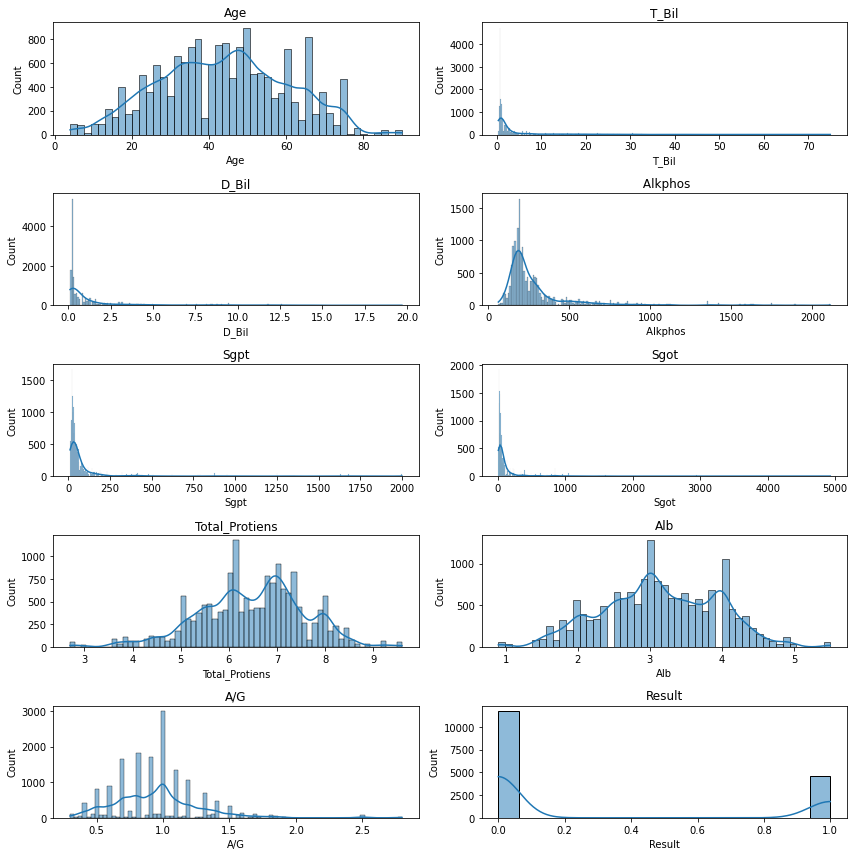

In [9]:
numerical_columns = [feature for feature in data.columns if feature != "Gender"]
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 12))
axes = axes.flatten()

# Loop through each numerical column and plot the histogram with KDE plot
for i, column in enumerate(numerical_columns):
    if i < 10:
        sns.histplot(data=data, x=column, kde=True, ax=axes[i])
        axes[i].set_title(column)
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

<span style = "color: blue"><strong>Inference :</strong> </span>
- There are <span style = "color: orange">significant skewness</span> in some data like SGPT, SGOT, AlkPhos, TotalBil, DirectBil
- The dataset is <span style = "color: orange">heavily imbalanced</span> as there is huge difference in the size of the output categories 
- Age, total Protients and albumins are <span style = "color: orange">normally distributed. </span>  
- Huge <span style = "color: orange">positive kurtosis </span> is present in the features of SGPT and SGOT 
- Age and albumin curves are little flattened than normal, which can be seen through the negetive kurtosis in there respective curves 
- There is <span style = "color: orange">minimal amount of data that have null values </span>, are present in the dataset. These values can either be dropped or be replaced with reasonable values.

### __Bivariate Statistical Analysis__

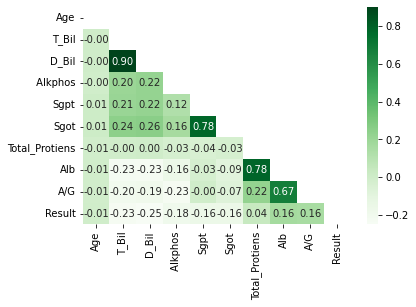

In [10]:
correlation_matrix = data.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, cmap='Greens', annot=True, fmt='.2f')
plt.show()

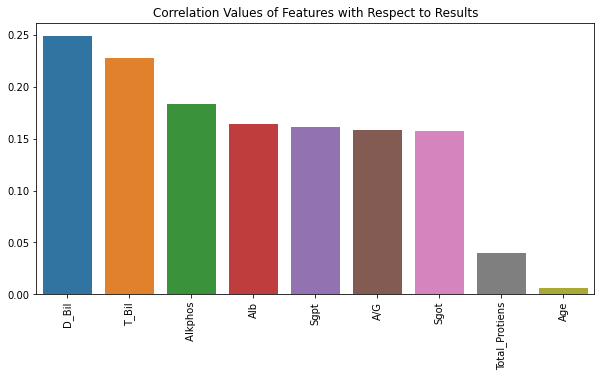

In [11]:
correlation_matrix = data.corr(numeric_only=True).abs()
corr_label = correlation_matrix["Result"].sort_values(ascending = False).drop("Result")

# Create a bar plot of the correlation values
plt.figure(figsize=(10,5))
sns.barplot(x=corr_label.index, y=corr_label.values)
plt.xticks(rotation=90)
plt.title("Correlation Values of Features with Respect to Results")
plt.show()

In [14]:
# Get the relevant columns as arrays
total_bilirubin = data['T_Bil'].values
direct_bilirubin = data['D_Bil'].values
sgot_aspartate_aminotransferase = data['Sgot'].values
sgpt_alamine_aminotransferase = data['Sgpt'].values
alb_albumin = data['Alb'].values
total_protiens = data['Total_Protiens'].values
alb_glb_ratio = data["A/G"].values

# Calculate Pearson correlation coefficients and p-values
r_bil, p_bil = pearsonr(total_bilirubin, direct_bilirubin)
r_sg, p_sg = pearsonr(sgot_aspartate_aminotransferase, sgpt_alamine_aminotransferase)
r_pr, p_pr = pearsonr(alb_albumin, total_protiens)
r_rat, p_rat = pearsonr(alb_albumin, alb_glb_ratio)

index = ["Tot_bil Vs Dir_bil", "SGOT Vs SGPT", "Alb Vs Tot_prot", "Alb Vs Alb/Glb Ratio"]
values = [(r_bil, p_bil), (r_sg, p_sg), (r_pr, p_pr), (r_rat, p_rat)]
columns = ["Pearson's Correlation", "p_value"]

table = pd.DataFrame(data = values, index = index, columns = columns) 
# table
table_str = table.to_string(float_format="{:0.3f}".format)

print(table_str)

                      Pearson's Correlation  p_value
Tot_bil Vs Dir_bil                    0.900    0.000
SGOT Vs SGPT                          0.776    0.000
Alb Vs Tot_prot                       0.780    0.000
Alb Vs Alb/Glb Ratio                  0.675    0.000


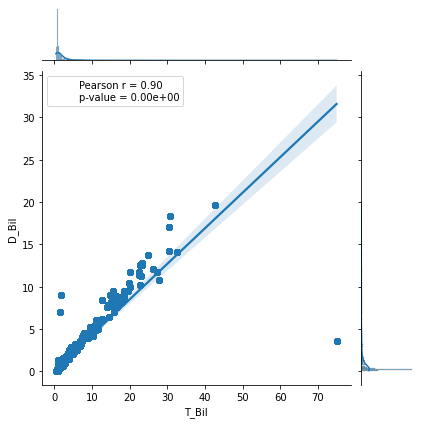

In [19]:
graph = sns.jointplot(data=data, x = "T_Bil", y = "D_Bil", kind="reg")
legend_text = f"Pearson r = {r_bil:.2f}\np-value = {p_bil:.2e}"
dummy = plt.scatter([], [], marker='None', label=legend_text)
graph.ax_joint.legend(handles=[dummy], loc='upper left')
plt.show()

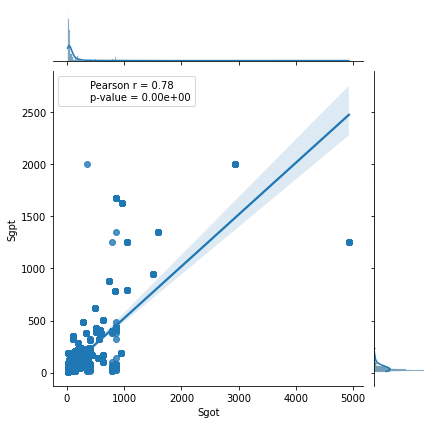

In [20]:
graph = sns.jointplot(data=data, x = "Sgot", y = "Sgpt", kind="reg")
legend_text = f"Pearson r = {r_sg:.2f}\np-value = {p_sg:.2e}"
dummy = plt.scatter([], [], marker='None', label=legend_text)
graph.ax_joint.legend(handles=[dummy], loc='upper left')
plt.show()

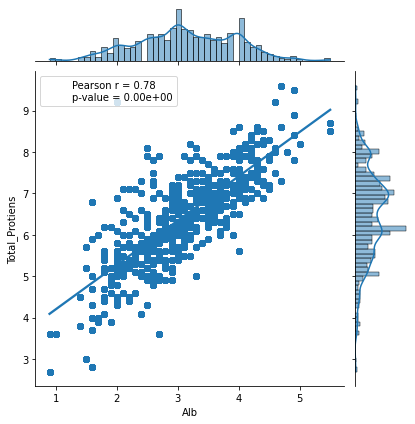

In [21]:
graph = sns.jointplot(data=data, x = "Alb", y = "Total_Protiens", kind="reg")
legend_text = f"Pearson r = {r_pr:.2f}\np-value = {p_pr:.2e}"
dummy = plt.scatter([], [], marker='None', label=legend_text)
graph.ax_joint.legend(handles=[dummy], loc='upper left')
plt.show()

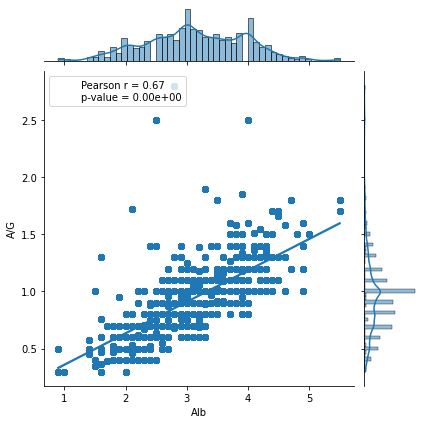

In [22]:
graph = sns.jointplot(data=data, x = "Alb", y = "A/G", kind="reg")
legend_text = f"Pearson r = {r_rat:.2f}\np-value = {p_rat:.2e}"
dummy = plt.scatter([], [], marker='None', label=legend_text)
graph.ax_joint.legend(handles=[dummy], loc='upper left')
plt.show()

<Axes: >

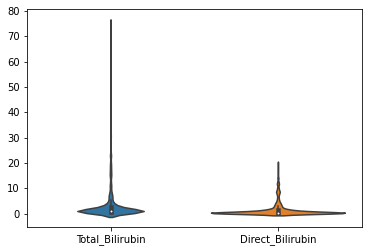

In [24]:
total_direct_bil = data[["Total_Bilirubin", "Direct_Bilirubin"]]
sns.violinplot(data=total_direct_bil)

<Axes: >

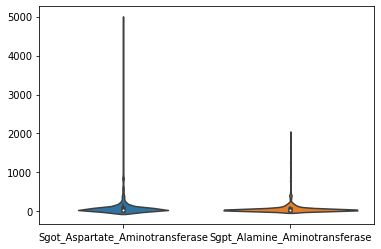

In [25]:
aspartate_alamine = data[["Sgot_Aspartate_Aminotransferase", "Sgpt_Alamine_Aminotransferase"]]
sns.violinplot(data=aspartate_alamine)

<Axes: >

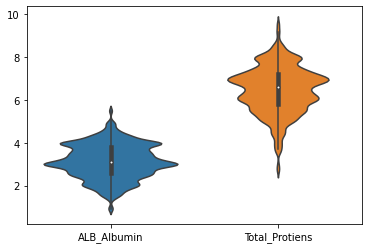

In [26]:
Total_Protiens_alb = data[["ALB_Albumin", "Total_Protiens"]]
sns.violinplot(data=Total_Protiens_alb)

<Axes: >

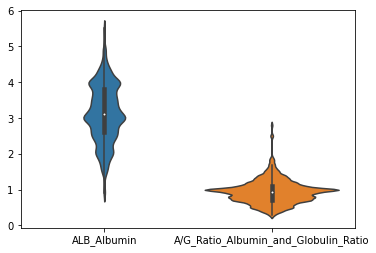

In [27]:
alb = data[["ALB_Albumin", "A/G_Ratio_Albumin_and_Globulin_Ratio"]]
sns.violinplot(data=alb)

<span style = "color: blue"><strong>Inference :</strong></span>
- After the box plot of the correlation values with the output label (Result), we see that <span style = "color: orange">Bilirubin and Alk Phos are highly correlated </span> with the output and <span style = "color: orange">Age is the least correlated with the output. </span> 
- After we have plot the correlation matrix of every pair of features, we have got <span style = "color: orange">four significant correlations (corr > 0.60)</span> :
    - Total Bilirubin and Direct Bilirubin 
    - SGPT and SGOT 
    - Albumin and Total Protiens 
    - Albumin and Albumin Globulin Ratio
- We have plot the scatterplot for each pair and fitted the regression line also to see the trend in their relation, we have <span style = "color: orange">linear relation between all the pairs</span>
- The <span style = "color: orange">pearson correlation and p-value </span> of the pairs show that 
    - they are higly correlated and 
    - as p-value is very close to 0, this trend in <span style = "color: orange">their correlation has a very less likelihood to change when new data comes. </span>
    - in easy terms, this correlation will stand true even a new data is collected 
- For feature selection we have plot the <span style = "color: orange">violin plots to check the variance the features</span> provide 
    - We can drop the features with low variance 
    - because the we must keep the values that show a greater variation of values in the data

### __Categorical Features__ <a class="anchor" id="4"></a>

The number of male patients:  11414
The number of female patients:  4975


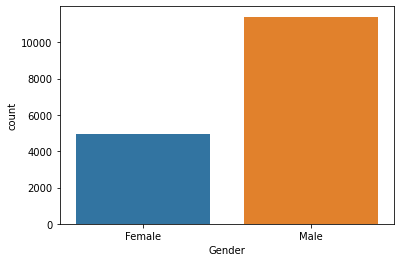

In [26]:
# checking the no of male and female patients 
sns.countplot(data = data, x = "Gender", label = "Count")
male, female = data["Gender"].value_counts()
print("The number of male patients: ", male)
print("The number of female patients: ", female)

In [27]:
# Do T-test for the categorical featuers 

### __Outliers__ <a class="anchor" id="5"></a>

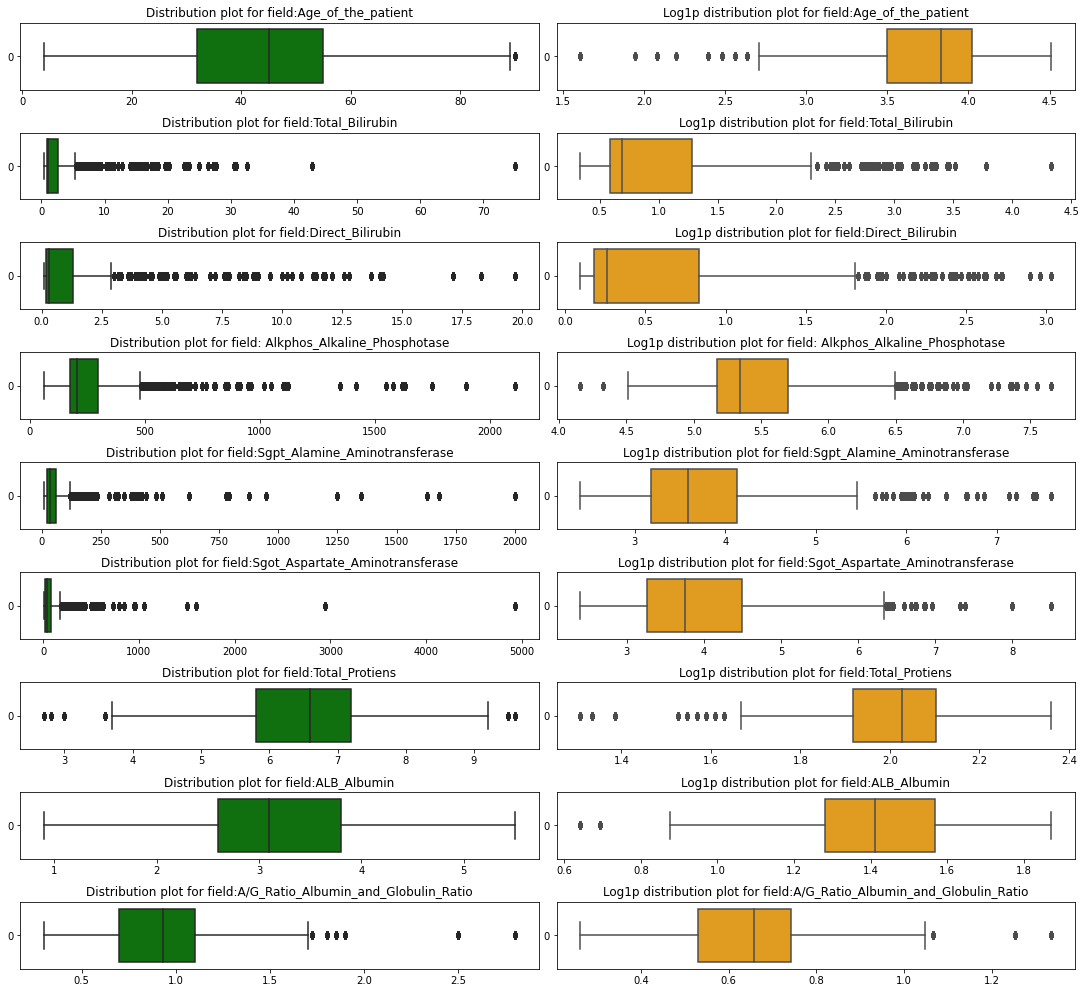

In [12]:
plt.figure(figsize=(15, 15))

for i, c in enumerate(data.drop('Result', axis=1).select_dtypes(include='number').columns):
    plt.subplot(10,2,i*2+1)
    sns.boxplot(data[c], color='green', orient="horizontal")
    plt.title('Distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

    
    plt.subplot(10,2,i*2+2)
    sns.boxplot(data[c].apply('log1p'), color='orange', orient="horizontal")
    plt.title('Log1p distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

<span style = "color: blue"><strong>Infernce :</strong></span>
- There are outliers in the datasets
- Majority are present in Bilirubins, Alk Phos and Aminos.
- But <span style = "color: orange">no outlier is a wrong value</span>, all are contextual outliers i.e they are extereme for a particular feature but not for the whole dataset 
- <span style = "color: orange">normalized plots of the outliers</span> are also shown and we can see that high correlated features' box plots are also similar

# Data Preprocessing <a class="anchor" id="6"></a>

In [7]:
# Label encoding 
le = LabelEncoder()
gender_encoded = le.fit_transform(data["Gender"])
data["Gender_encoded"] = gender_encoded
data = data.drop(["Gender"], axis = 1)
data.head(10)

,Age,T_Bil,D_Bil,Alkphos,Sgpt,Sgot,Total_Protiens,Alb,A/G,Result,Gender_encoded
0,65.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,0,0
1,62.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,0,1
2,62.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,0,1
3,58.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,0,1
4,72.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,0,1
5,46.0,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.30,0,1
7,29.0,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,0,0
8,17.0,0.9,0.3,202.0,22.0,19.0,7.4,4.1,1.20,1,1
9,55.0,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.00,0,1
10,57.0,0.6,0.1,210.0,51.0,59.0,5.9,2.7,0.80,0,1


In [8]:
# Seperate the features and the labels
X = data.drop(["Result"], axis = 1)
y = data["Result"] 
print(X.shape, y.shape)

(16389, 10) (16389,)


# Correcting Imbalanced Dataset <a class="anchor" id="7"></a>

In [9]:
# Upsampling the data 
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled.shape, y_resampled.shape 

((23500, 10), (23500,))

In [10]:
# Sanitary Check 
no_liver_disease, liver_disease = y_resampled.value_counts()
total_patients = no_liver_disease + liver_disease

print("Total patients: ", total_patients)

print("Number of patients with no liver disease", no_liver_disease)
print("Number of patients with liver disease: ", liver_disease)

print(f"Percentage negetive: {round(no_liver_disease/total_patients * 100, 3)} %")
print(f"Percentage positive: {round(liver_disease/total_patients* 100, 3)} %")

Total patients:  23500
Number of patients with no liver disease 11750
Number of patients with liver disease:  11750
Percentage negetive: 50.0 %
Percentage positive: 50.0 %


# Feature Selection  <a class="anchor" id="8"></a>
<span style = "color:red"> <strong> Note: This part of the pipeline is not used in this research paper.</strong> </span>

We will keep the following features (from the above inferences made):
- Age 
- Gender 
- Total Bilirubin 
- SGOT 
- Albumin
- Total Protiens
- Alb/Glb ratio

In [15]:
X_resampled.head()

,Age_of_the_patient,Total_Bilirubin,Direct_Bilirubin,Alkphos_Alkaline_Phosphotase,Sgpt_Alamine_Aminotransferase,Sgot_Aspartate_Aminotransferase,Total_Protiens,ALB_Albumin,A/G_Ratio_Albumin_and_Globulin_Ratio,Gender_of_the_patient_encoded
0,65.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,0
1,62.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


Execute anyone of the bellow two codes 

In [25]:
X_resampled = X_resampled[["Age_of_the_patient",
        "Gender_of_the_patient_encoded",
        "Total_Bilirubin",
        "Sgot_Aspartate_Aminotransferase",
        "ALB_Albumin",
        "Total_Protiens",
        "A/G_Ratio_Albumin_and_Globulin_Ratio"]]
X_resampled.head()

,Age_of_the_patient,Gender_of_the_patient_encoded,Total_Bilirubin,Sgot_Aspartate_Aminotransferase,ALB_Albumin,Total_Protiens,A/G_Ratio_Albumin_and_Globulin_Ratio
0,65.0,0,0.7,18.0,3.3,6.8,0.90
1,62.0,1,10.9,100.0,3.2,7.5,0.74
2,62.0,1,7.3,68.0,3.3,7.0,0.89
3,58.0,1,1.0,20.0,3.4,6.8,1.00
4,72.0,1,3.9,59.0,2.4,7.3,0.40


In [28]:
X_resampled["sgot_sgpt_ratio"] = X_resampled["Sgot_Aspartate_Aminotransferase"] / X_resampled["Sgpt_Alamine_Aminotransferase"]
X_resampled = X_resampled[["Age_of_the_patient",
        "Gender_of_the_patient_encoded",
        "Total_Bilirubin",
        "ALB_Albumin",
        "Total_Protiens",
        "A/G_Ratio_Albumin_and_Globulin_Ratio",
        "sgot_sgpt_ratio"]]
X_resampled.head()

,Age_of_the_patient,Gender_of_the_patient_encoded,Total_Bilirubin,ALB_Albumin,Total_Protiens,A/G_Ratio_Albumin_and_Globulin_Ratio,sgot_sgpt_ratio
0,65.0,0,0.7,3.3,6.8,0.90,1.125000
1,62.0,1,10.9,3.2,7.5,0.74,1.562500
2,62.0,1,7.3,3.3,7.0,0.89,1.133333
3,58.0,1,1.0,3.4,6.8,1.00,1.428571
4,72.0,1,3.9,2.4,7.3,0.40,2.185185


In [29]:
X_resampled.shape, y_resampled.shape

((24104, 7), (24104,))

# Feature Scaling <a class="anchor" id="9"></a>

In [11]:
# Standardizing the data 
scaler = StandardScaler()
X_std = scaler.fit_transform(X_resampled)

X_std = pd.DataFrame(X_std, columns = X_resampled.columns)
X_std.head()

,Age,T_Bil,D_Bil,Alkphos,Sgpt,Sgot,Total_Protiens,Alb,A/G,Gender_encoded
0,1.299821,-0.373905,-0.436280,-0.379215,-0.329852,-0.304473,0.268010,0.127098,-0.225587,-1.313375
1,1.116433,1.546198,1.733233,1.961866,-0.015062,0.040763,0.915267,0.000828,-0.739070,0.761397
2,1.116433,0.868515,1.170767,1.006229,-0.041295,-0.093963,0.452941,0.127098,-0.257679,0.761397
3,0.871915,-0.317431,-0.315751,-0.402078,-0.342968,-0.296052,0.268010,0.253368,0.095340,0.761397
4,1.727728,0.228480,0.327068,-0.342636,-0.257713,-0.131855,0.730337,-1.009331,-1.830221,0.761397


# Train, Validation, Test Set Split  <a class="anchor" id="10"></a>

In [12]:
# Split of the standardized data 
X_train_val_std, X_test_std, y_train_val_std, y_test_std = train_test_split(X_std, y_resampled, test_size=0.15, random_state=42)

X_train_std, X_val_std, y_train_std, y_val_std = train_test_split(X_train_val_std, y_train_val_std, test_size=0.15, random_state=42)

print('Train set size:', len(X_train_std))
print('Validation set size:', len(X_val_std))
print('Test set size:', len(X_test_std))

# Sanitary check
len(X_train_std) + len(X_val_std) + len(X_test_std)

Train set size: 16978
Validation set size: 2997
Test set size: 3525


23500

# Machine Learning Model  <a class="anchor" id="11"></a>

### Support Vector Machine 

__Linear Support Vector Machine__

In [14]:
linear_clf = SVC(kernel = "linear")

In [19]:
# Hyper Parameter Tuning and 5-fold crossvalidation 
linear_params = {
    "C": [0.1] # hyper parameters were [0.1, 1, 2, 3, 5, 10]
}
linear = GridSearchCV(linear_clf, linear_params, cv = 5)
linear.fit(X_train_std, y_train_std)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'), param_grid={'C': [0.1]})

In [53]:
print('Best C parameter:', linear.best_params_['C'])

Best C parameter: 0.1


In [20]:
train = linear.best_score_

In [21]:
val = linear.score(X_val_std, y_val_std)
test = linear.score(X_test_std, y_test_std)

In [15]:
lin_svm = SVC(kernel="linear", C = 0.1)
start = time.time()
lin_svm.fit(X_train_std, y_train_std)
end = time.time()

In [57]:
save_model(lin_svm, "linear_svm")

In [22]:
start1 = time.time()
y_pred = lin_svm.predict(X_test_std)
end1 = time.time()

time1 = end1 - start1 

lin_svm_time_pred = X_test_std.shape[0] / time1

: The time and speed analysis of the Linear SVM algorithm : 
The training time of Linear SVM is: 10.963876962661743 sec
The prediction speed of the Linear SVM is: 3544 obs/sec
: The classifcation report of the Linear SVM algorithm : 
              precision    recall  f1-score   support

           0       0.85      0.51      0.64      1740
           1       0.66      0.91      0.76      1785

    accuracy                           0.71      3525
   macro avg       0.75      0.71      0.70      3525
weighted avg       0.75      0.71      0.70      3525

The training Accuracy: 0.706797219634639  The validation set Accuracy: 0.711378044711378  The test set Accuracy: 0.7123404255319149
: The confusion matrix of teh Linear SVM algorithm : 


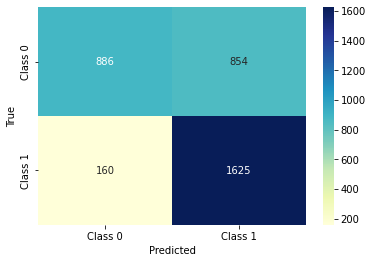

In [25]:
lin_svm_time_train = end - start 
print(": The time and speed analysis of the Linear SVM algorithm : ")
print(f'The training time of Linear SVM is: {lin_svm_time_train} sec')
print(f'The prediction speed of the Linear SVM is: {round(lin_svm_time_pred)} obs/sec')
print("=========================================================")
print(": The classifcation report of the Linear SVM algorithm : ")
print(classification_report(y_test_std, y_pred))
print(f"The training Accuracy: {train}  The validation set Accuracy: {val}  The test set Accuracy: {test}")
print("=========================================================")
print(": The confusion matrix of teh Linear SVM algorithm : ")
target_name = ['Class 0', 'Class 1']
conf_mat = confusion_matrix(y_test_std, y_pred)
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt = 'd', xticklabels=target_name, yticklabels=target_name)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

__Quadratic Support Vector Machine__

In [13]:
quad_clf = SVC(kernel = "poly", degree = 2)

In [14]:
# Hyper Parameter Tuning and 5-fold crossvalidation 
quad_params = {
    "C": [20],  # c - 1, 2, 3, 5, 10, 20
    "coef0": [5] # coef0 - 1, 5, 10
}
quad = GridSearchCV(quad_clf, quad_params, cv = 5)
quad.fit(X_train_std, y_train_std)

GridSearchCV(cv=5, estimator=SVC(degree=2, kernel='poly'),
             param_grid={'C': [20], 'coef0': [5]})

In [15]:
print('Best parameters:', quad.best_params_)

Best parameters: {'C': 20, 'coef0': 5}


In [16]:
train = quad.score(X_train_std, y_train_std)

In [17]:
val = quad.score(X_val_std, y_val_std)
test = quad.score(X_test_std, y_test_std)

In [27]:
quad_svm = SVC(kernel="poly", degree = 2, C = 20, coef0 = 5)
start = time.time()
quad_svm.fit(X_train_std, y_train_std)
end = time.time()

In [18]:
start1 = time.time()
y_pred = quad.predict(X_test_std)
end1 = time.time()

time1 = end1 - start1 

quad_svm_time_pred = X_test_std.shape[0] / time1

In [48]:
save_model(quad_svm, "quadratic_svm")

__With the pararmeter tuning and 5-fold cross validation accuracy is less, and it should be this only__

: The time and speed analysis of the Quadratic SVM algorithm : 
The training time of Quadratic SVM is: 365 sec
The prediction speed of the Quadratic SVM is: 3758 obs/sec
: The classifcation report of the Quadratic SVM algorithm : 
              precision    recall  f1-score   support

           0       0.84      0.53      0.65      1740
           1       0.66      0.90      0.76      1785

    accuracy                           0.72      3525
   macro avg       0.75      0.71      0.70      3525
weighted avg       0.75      0.72      0.70      3525

The training Accuracy: 0.7155730945930027  The validation set Accuracy: 0.721388054721388  The test set Accuracy: 0.7157446808510638
: The confusion matrix of the Quadratic SVM algorithm : 


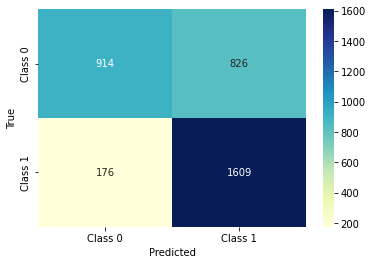

In [19]:
quad_svm_time_train = 365
print(": The time and speed analysis of the Quadratic SVM algorithm : ")
print(f'The training time of Quadratic SVM is: {quad_svm_time_train} sec')
print(f'The prediction speed of the Quadratic SVM is: {round(quad_svm_time_pred)} obs/sec')
print("=========================================================")
print(": The classifcation report of the Quadratic SVM algorithm : ")
print(classification_report(y_test_std, y_pred))
print(f"The training Accuracy: {train}  The validation set Accuracy: {val}  The test set Accuracy: {test}")
print("=========================================================")
print(": The confusion matrix of the Quadratic SVM algorithm : ")
target_name = ['Class 0', 'Class 1']
conf_mat = confusion_matrix(y_test_std, y_pred)
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt = 'd', xticklabels=target_name, yticklabels=target_name)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

__Cubic Support Vector Machine__

In [56]:
cubic_clf = SVC(kernel = "poly", degree = 3)

In [ ]:
# Hyper Parameter Tuning and 5-fold crossvalidation 
cubic_params = {
    "C": [10, 20],  # C - 1, 2, 5, 10, 20
    "coef0": [5]  # coef0 - 0.1, 1, 5, 10
}
cubic = GridSearchCV(cubic_clf, cubic_params, cv = 5)
cubic.fit(X_train_std, y_train_std)

In [ ]:
print('Best parameters:', cubic.best_params_)

In [ ]:
cubic.best_score_

In [ ]:
val = cubic.score(X_val_std, y_val_std)
test = cubic.score(X_test_std, y_test_std)

In [20]:
cubic_svm = SVC(kernel="poly", degree = 3, C = 20, coef0 = 5)
start = time.time()
cubic_svm.fit(X_train_std, y_train_std)
end = time.time()

In [21]:
start1 = time.time()
y_pred = cubic_svm.predict(X_test_std)
end1 = time.time()

time1 = end1 - start1 

cubic_svm_time_pred = X_test_std.shape[0] / time1

In [22]:
train = cubic_svm.score(X_train_std, y_train_std)
val = cubic_svm.score(X_val_std, y_val_std)
test = cubic_svm.score(X_test_std, y_test_std)

In [44]:
save_model(cubic_svm, "cubic_svm")

: The time and speed analysis of the Cubic SVM algorithm : 
The training time of Cubic SVM is: 330.77949500083923 sec
The prediction speed of the Cubic SVM is: 4655.443875390251 obs/sec
: The classifcation report of the Cubic SVM algorithm : 
              precision    recall  f1-score   support

           0       0.93      0.62      0.74      1740
           1       0.72      0.96      0.82      1785

    accuracy                           0.79      3525
   macro avg       0.83      0.79      0.78      3525
weighted avg       0.83      0.79      0.78      3525

The training Accuracy: 78.72540935328072  The validation set Accuracy: 78.37837837837837  The test set Accuracy: 79.06382978723404
: The confusion matrix of the Cubic SVM algorithm : 


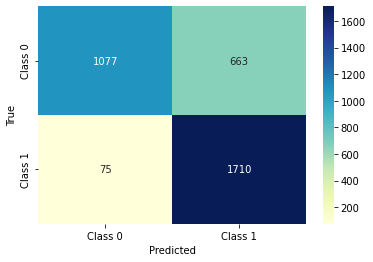

In [23]:
cubic_svm_time_train = end - start 
print(": The time and speed analysis of the Cubic SVM algorithm : ")
print(f'The training time of Cubic SVM is: {cubic_svm_time_train} sec')
print(f'The prediction speed of the Cubic SVM is: {cubic_svm_time_pred} obs/sec')
print("=========================================================")
print(": The classifcation report of the Cubic SVM algorithm : ")
print(classification_report(y_test_std, y_pred))
print(f"The training Accuracy: {train*100}  The validation set Accuracy: {val*100}  The test set Accuracy: {test*100}")
print("=========================================================")
print(": The confusion matrix of the Cubic SVM algorithm : ")
target_name = ['Class 0', 'Class 1']
conf_mat = confusion_matrix(y_test_std, y_pred)
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt = 'd', xticklabels=target_name, yticklabels=target_name)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

__Fine Gaussian SVM__

In [24]:
fine_gamma = np.sqrt(10)/4
medium_gamma = np.sqrt(10)
coarse_gamma = np.sqrt(10)*4

print(f'Gamma of fine gaussian SVM: {fine_gamma}, Gamma of medium gaussian SVM: {medium_gamma}, Gamma of coarse gaussian SVM: {coarse_gamma}')

Gamma of fine gaussian SVM: 0.7905694150420949, Gamma of medium gaussian SVM: 3.1622776601683795, Gamma of coarse gaussian SVM: 12.649110640673518


In [25]:
fine_gauss_clf = SVC(kernel = "rbf", gamma = fine_gamma)

In [35]:
# Hyper Parameter Tuning and 5-fold crossvalidation 
fine_gauss_params = {
    "C": [1, 2, 5, 10]
}
fine_gauss = GridSearchCV(fine_gauss_clf, fine_gauss_params, cv = 5)
fine_gauss.fit(X_train_std, y_train_std)

GridSearchCV(cv=5, estimator=SVC(gamma=0.7905694150420949),
             param_grid={'C': [1, 2, 5, 10]})

In [36]:
print('Best parameters:', fine_gauss.best_params_)

Best parameters: {'C': 10}


In [42]:
train = fine_gauss.best_score_

In [38]:
val = fine_gauss.score(X_val_std, y_val_std)
test = fine_gauss.score(X_test_std, y_test_std)

In [26]:
# Best Model training and scores 
fine_gauss_svm = SVC(kernel="rbf", gamma = fine_gamma, C = 10 )
start = time.time()
fine_gauss_svm.fit(X_train_std, y_train_std)
end = time.time()

In [27]:
start1 = time.time()
y_pred = fine_gauss_svm.predict(X_test_std)
end1 = time.time()

time1 = end1 - start1 

fine_gauss_svm_time_pred = X_test_std.shape[0] / time1

In [28]:
train = fine_gauss_svm.score(X_train_std, y_train_std)
val = fine_gauss_svm.score(X_val_std, y_val_std)
test = fine_gauss_svm.score(X_test_std, y_test_std)

In [29]:
save_model(fine_gauss_svm, "fine_gauss_svm")

: The time and speed analysis of the fine Gaussian SVM algorithm : 
The training time of fine Gaussian SVM is: 25.238207578659058 sec
The prediction speed of the fine Gaussian SVM is: 1177.7886914001213 obs/sec
: The classifcation report of the fine Gaussian SVM algorithm : 
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      1740
           1       0.85      0.98      0.91      1785

    accuracy                           0.90      3525
   macro avg       0.91      0.90      0.90      3525
weighted avg       0.91      0.90      0.90      3525

The training Accuracy: 92.10743314878077  The validation set Accuracy: 90.52385719052386  The test set Accuracy: 90.29787234042553
: The confusion matrix of the fine Gaussian SVM algorithm : 


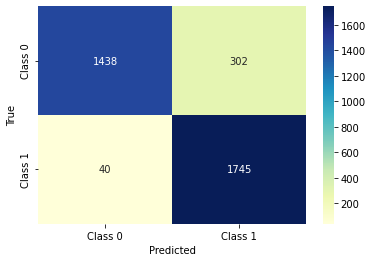

In [29]:
fine_gauss_svm_time_train = end - start 
print(": The time and speed analysis of the fine Gaussian SVM algorithm : ")
print(f'The training time of fine Gaussian SVM is: {fine_gauss_svm_time_train} sec')
print(f'The prediction speed of the fine Gaussian SVM is: {fine_gauss_svm_time_pred} obs/sec')
print("=========================================================")
print(": The classifcation report of the fine Gaussian SVM algorithm : ")
print(classification_report(y_test_std, y_pred))
print(f"The training Accuracy: {train*100}  The validation set Accuracy: {val*100}  The test set Accuracy: {test*100}")
print("=========================================================")
print(": The confusion matrix of the fine Gaussian SVM algorithm : ")
target_name = ['Class 0', 'Class 1']
conf_mat = confusion_matrix(y_test_std, y_pred)
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt = 'd', xticklabels=target_name, yticklabels=target_name)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

__Medium Gaussian SVM__

In [49]:
medium_gauss_clf = SVC(kernel = "rbf", gamma = medium_gamma)

In [46]:
medium_gauss_params = {
    "C": [1, 2, 5, 10, 20]
}
medium_gauss = GridSearchCV(medium_gauss_clf, medium_gauss_params, cv = 5)
medium_gauss.fit(X_train_std, y_train_std)

GridSearchCV(cv=5, estimator=SVC(gamma=3.1622776601683795),
             param_grid={'C': [1, 2, 5, 10, 20]})

In [47]:
print('Best parameters:', medium_gauss.best_params_)

Best parameters: {'C': 20}


In [49]:
train = medium_gauss.best_score_

In [50]:
val = medium_gauss.score(X_val_std, y_val_std)
test = medium_gauss.score(X_test_std, y_test_std)

In [30]:
medium_gauss_svm = SVC(kernel="rbf", gamma = medium_gamma, C = 20)
start = time.time()
medium_gauss_svm.fit(X_train_std, y_train_std)
end = time.time()

In [31]:
start1 = time.time()
y_pred = medium_gauss_svm.predict(X_test_std)
end1 = time.time()

time1 = end1 - start1 

medium_gauss_svm_time_pred = X_test_std.shape[0] / time1

In [32]:
train = medium_gauss_svm.score(X_train_std, y_train_std)
val = medium_gauss_svm.score(X_val_std, y_val_std)
test = medium_gauss_svm.score(X_test_std, y_test_std)

In [34]:
save_model(medium_gauss_svm, "medium_gauss_svm")

: The time and speed analysis of the Medium Gaussian SVM algorithm : 
The training time of Medium Gaussian SVM is: 61.456475257873535 sec
The prediction speed of the Medium Gaussian SVM is: 1255.5849069486485 obs/sec
: The classifcation report of the Medium Gaussian SVM algorithm : 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1740
           1       0.95      0.97      0.96      1785

    accuracy                           0.96      3525
   macro avg       0.96      0.96      0.96      3525
weighted avg       0.96      0.96      0.96      3525

The training Accuracy: 99.2578631169749  The validation set Accuracy: 96.06272939606274  The test set Accuracy: 96.19858156028369
: The confusion matrix of the Medium Gaussian SVM algorithm : 


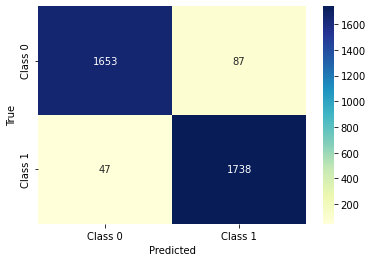

In [33]:
medium_gauss_svm_time_train = end - start 
print(": The time and speed analysis of the Medium Gaussian SVM algorithm : ")
print(f'The training time of Medium Gaussian SVM is: {medium_gauss_svm_time_train} sec')
print(f'The prediction speed of the Medium Gaussian SVM is: {medium_gauss_svm_time_pred} obs/sec')
print("=========================================================")
print(": The classifcation report of the Medium Gaussian SVM algorithm : ")
print(classification_report(y_test_std, y_pred))
print(f"The training Accuracy: {train*100}  The validation set Accuracy: {val*100}  The test set Accuracy: {test*100}")
print("=========================================================")
print(": The confusion matrix of the Medium Gaussian SVM algorithm : ")
target_name = ['Class 0', 'Class 1']
conf_mat = confusion_matrix(y_test_std, y_pred)
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt = 'd', xticklabels=target_name, yticklabels=target_name)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

__Coarse Gaussian SVM__

In [59]:
coarse_gauss_clf = SVC(kernel = "rbf", gamma = coarse_gamma)

In [58]:
coarse_gauss_params = {
    "C": [1, 2, 3, 5, 10]
}
coarse_gauss = GridSearchCV(coarse_gauss_clf, coarse_gauss_params, cv = 5)
coarse_gauss.fit(X_train_std, y_train_std)

GridSearchCV(cv=5, estimator=SVC(gamma=12.649110640673518),
             param_grid={'C': [1, 2, 10, 20]})

In [59]:
print('Best parameters:', coarse_gauss.best_params_)

Best parameters: {'C': 10}


In [60]:
train = coarse_gauss.best_score_

In [61]:
val = coarse_gauss.score(X_val_std, y_val_std)
test = coarse_gauss.score(X_test_std, y_test_std)

In [34]:
coarse_gauss_svm = SVC(kernel="rbf", gamma = coarse_gamma, C = 10)
start = time.time()
coarse_gauss_svm.fit(X_train_std, y_train_std)
end = time.time()

In [35]:
start1 = time.time()
y_pred = coarse_gauss_svm.predict(X_test_std)
end1 = time.time()

time1 = end1 - start1 

coarse_gauss_svm_time_pred = X_test_std.shape[0] / time1

In [36]:
train = coarse_gauss_svm.score(X_train_std, y_train_std)
val = coarse_gauss_svm.score(X_val_std, y_val_std)
test = coarse_gauss_svm.score(X_test_std, y_test_std)

In [39]:
save_model(coarse_gauss_svm, "coarse_gauss_svm")

: The time and speed analysis of the Coarse Gaussian SVM algorithm : 
The training time of Coarse Gaussian SVM is: 65.64324426651001 sec
The prediction speed of the Coarse Gaussian SVM is: 710.6031247766587 obs/sec
: The classifcation report of the Coarse Gaussian SVM algorithm : 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1740
           1       0.97      0.96      0.96      1785

    accuracy                           0.96      3525
   macro avg       0.96      0.96      0.96      3525
weighted avg       0.96      0.96      0.96      3525

The training Accuracy: 99.99411002473789  The validation set Accuracy: 96.16282949616283  The test set Accuracy: 96.28368794326241
: The confusion matrix of the Coarse Gaussian SVM algorithm : 


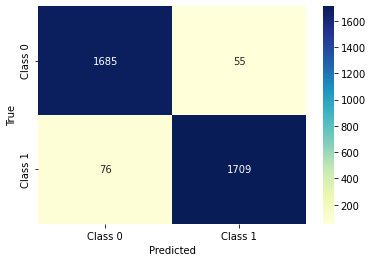

In [37]:
coarse_gauss_svm_time_train = end - start 
print(": The time and speed analysis of the Coarse Gaussian SVM algorithm : ")
print(f'The training time of Coarse Gaussian SVM is: {coarse_gauss_svm_time_train} sec')
print(f'The prediction speed of the Coarse Gaussian SVM is: {coarse_gauss_svm_time_pred} obs/sec')
print("=========================================================")
print(": The classifcation report of the Coarse Gaussian SVM algorithm : ")
print(classification_report(y_test_std, y_pred))
print(f"The training Accuracy: {train*100}  The validation set Accuracy: {val*100}  The test set Accuracy: {test*100}")
print("=========================================================")
print(": The confusion matrix of the Coarse Gaussian SVM algorithm : ")
target_name = ['Class 0', 'Class 1']
conf_mat = confusion_matrix(y_test_std, y_pred)
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt = 'd', xticklabels=target_name, yticklabels=target_name)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### __AUC and ROC for the SVM's__

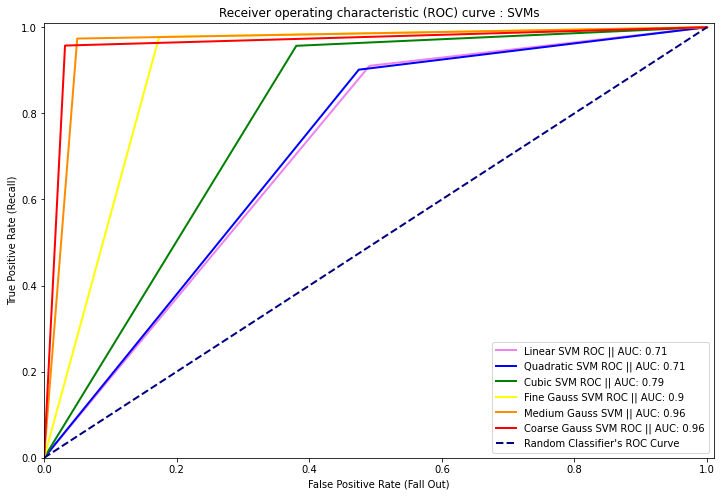

In [81]:
lp = lin_svm.predict(X_test_std)
qp = quad_svm.predict(X_test_std)
cp =  cubic_svm.predict(X_test_std)
fgp = fine_gauss_svm.predict(X_test_std)
mgp = medium_gauss_svm.predict(X_test_std)
cgp = coarse_gauss_svm.predict(X_test_std)

fpr_lp, tpr_lp, _ = roc_curve(y_test_std, lp)
auc_lp = auc(fpr_lp, tpr_lp)
fpr_qp, tpr_qp, _ = roc_curve(y_test_std, qp)
auc_qp = auc(fpr_qp, tpr_qp)
fpr_cp, tpr_cp, _ = roc_curve(y_test_std, cp)
auc_cp = auc(fpr_cp, tpr_cp)
fpr_fgp, tpr_fgp, _ = roc_curve(y_test_std, fgp)
auc_fgp = auc(fpr_fgp, tpr_fgp)
fpr_mgp, tpr_mgp, _ = roc_curve(y_test_std, mgp)
auc_mgp = auc(fpr_mgp, tpr_mgp)
fpr_cgp, tpr_cgp, _ = roc_curve(y_test_std, cgp)
auc_cgp = auc(fpr_cgp, tpr_cgp)

plt.figure(figsize=(12, 8))
plt.plot(fpr_lp, tpr_lp, color='violet', lw=2, label=f'Linear SVM ROC || AUC: {round(auc_lp, 2)}')
plt.plot(fpr_qp, tpr_qp, color='blue', lw=2, label=f'Quadratic SVM ROC || AUC: {round(auc_qp, 2)}')
plt.plot(fpr_cp, tpr_cp, color='green', lw=2, label=f'Cubic SVM ROC || AUC: {round(auc_cp, 2)}')
plt.plot(fpr_fgp, tpr_fgp, color='yellow', lw=2, label=f'Fine Gauss SVM ROC || AUC: {round(auc_fgp, 2)}')
plt.plot(fpr_mgp, tpr_mgp, color='darkorange', lw=2, label=f'Medium Gauss SVM || AUC: {round(auc_mgp, 2)}')
plt.plot(fpr_cgp, tpr_cgp, color='red', lw=2, label=f'Coarse Gauss SVM ROC || AUC: {round(auc_cgp, 2)}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label = "Random Classifier's ROC Curve")
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate (Fall Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic (ROC) curve : SVMs')
plt.legend(loc="lower right")
plt.show()

### Neural Networks 

__Narrow Nerural Networks__

In [31]:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(10, input_shape =  (10,), activation='relu'))
    model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

    # early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
    # ,callback = [early_stop]
    history1 = model.fit(X_train_std, y_train_std, epochs = 1000)

Epoch 1/1000
545/545 [==============================] - 2s 2ms/step - loss: 0.6390 - accuracy: 0.6502
Epoch 2/1000
545/545 [==============================] - 2s 4ms/step - loss: 0.5633 - accuracy: 0.7068
Epoch 3/1000
545/545 [==============================] - 3s 5ms/step - loss: 0.5553 - accuracy: 0.7168
Epoch 4/1000
545/545 [==============================] - 2s 4ms/step - loss: 0.5516 - accuracy: 0.7207
Epoch 5/1000
545/545 [==============================] - 2s 4ms/step - loss: 0.5489 - accuracy: 0.7227
Epoch 6/1000
545/545 [==============================] - 2s 4ms/step - loss: 0.5468 - accuracy: 0.7217
Epoch 7/1000
545/545 [==============================] - 2s 4ms/step - loss: 0.5448 - accuracy: 0.7194
Epoch 8/1000
545/545 [==============================] - 2s 4ms/step - loss: 0.5428 - accuracy: 0.7191
Epoch 9/1000
545/545 [==============================] - 2s 4ms/step - loss: 0.5407 - accuracy: 0.7174
Epoch 10/1000
545/545 [==============================] - 2s 4ms/step - loss: 0.538

In [32]:
nn1_train_time = 40*60 
start = time.time()
nn1_pred_prob = model.predict(X_test_std)
nn1_pred = np.where(nn1_pred_prob >= 0.5, 1, 0)
end = time.time()
nn1_pred_time = X_test_std.shape[0] / (end - start) 

train_percentage = model.evaluate(X_train_std, y_train_std)
val_percentage = model.evaluate(X_val_std, y_val_std)
test_percentage = model.evaluate(X_test_std, y_test_std)

conf_mat = confusion_matrix(y_test_std, nn1_pred)

113/113 [==============================] - 0s 4ms/step - loss: 0.4207 - accuracy: 0.8017


: The time and speed analysis of the Narrow NN algorithm : 
The training time of Narrow NN is: 2400 sec
The prediction speed of the Narrow NN is: 4872 obs/sec
: The classifcation report of the Narrow NN algorithm : 
              precision    recall  f1-score   support

     Class 0       0.90      0.68      0.77      1820
     Class 1       0.74      0.93      0.82      1796

    accuracy                           0.80      3616
   macro avg       0.82      0.80      0.80      3616
weighted avg       0.82      0.80      0.80      3616

Train Accuracy=80.5099368095398 %
Validation set accuracy = 80.05855679512024 %
Test Accuracy=80.17145991325378 %
: The confusion matrix of the Narrow NN algorithm : 


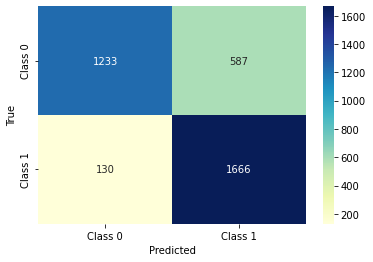

In [33]:
print(": The time and speed analysis of the Narrow NN algorithm : ")
print(f'The training time of Narrow NN is: {nn1_train_time} sec')
print(f'The prediction speed of the Narrow NN is: {round(nn1_pred_time)} obs/sec')
print("=========================================================")
print(": The classifcation report of the Narrow NN algorithm : ")

target_name = ['Class 0', 'Class 1']

print(classification_report(y_test_std, nn1_pred, target_names=target_name, zero_division=1.0))
print(f"Train Accuracy={train_percentage[1] * 100} %")
print(f"Validation set accuracy = {val_percentage[1] * 100} %")
print(f"Test Accuracy={test_percentage[1] * 100} %")
print("=========================================================")
print(": The confusion matrix of the Narrow NN algorithm : ")
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt = 'd', xticklabels=target_name, yticklabels=target_name)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [70]:
history1.history.keys()

dict_keys(['loss', 'accuracy'])

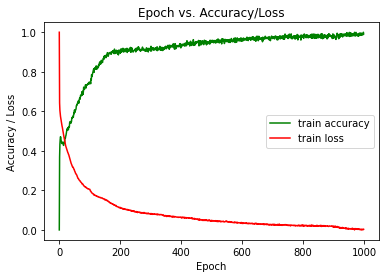

In [34]:
l = history1.history["loss"]
a = history1.history["accuracy"]
l_norm = np.array(l)
l_norm = (l_norm - l_norm.min()) / (l_norm.max() - l_norm.min())
l_norm = l_norm.tolist()
a_norm = np.array(a)
a_norm = (a_norm - a_norm.min()) / (a_norm.max() - a_norm.min())
a_norm = a_norm.tolist()
plt.plot(a_norm, label='train accuracy', color = "green")
plt.plot(l_norm, label='train loss', color  = "red")
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.title('Epoch vs. Accuracy/Loss')
plt.legend(loc = 'best')
plt.show()

__Medium Neural Networks__

In [23]:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(25, input_shape =  (10,), activation='relu'))
    model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer= "adam", metrics=['accuracy'])

    # early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
    # , callbacks = [early_stop]
    history2 = model.fit(X_train_std, y_train_std, epochs = 1000)

Epoch 1/1000
545/545 [==============================] - 4s 5ms/step - loss: 0.6120 - accuracy: 0.6623
Epoch 2/1000
545/545 [==============================] - 3s 5ms/step - loss: 0.5528 - accuracy: 0.7112
Epoch 3/1000
545/545 [==============================] - 3s 5ms/step - loss: 0.5458 - accuracy: 0.7103
Epoch 4/1000
545/545 [==============================] - 3s 5ms/step - loss: 0.5416 - accuracy: 0.7117
Epoch 5/1000
545/545 [==============================] - 3s 5ms/step - loss: 0.5378 - accuracy: 0.7094
Epoch 6/1000
545/545 [==============================] - 3s 5ms/step - loss: 0.5348 - accuracy: 0.7107
Epoch 7/1000
545/545 [==============================] - 3s 5ms/step - loss: 0.5313 - accuracy: 0.7108
Epoch 8/1000
545/545 [==============================] - 3s 5ms/step - loss: 0.5282 - accuracy: 0.7109
Epoch 9/1000
545/545 [==============================] - 3s 5ms/step - loss: 0.5251 - accuracy: 0.7118
Epoch 10/1000
545/545 [==============================] - 2s 4ms/step - loss: 0.521

In [24]:
nn2_train_time = 36*60 
start = time.time()
nn2_pred_prob = model.predict(X_test_std)
nn2_pred = np.where(nn2_pred_prob >= 0.5, 1, 0)
end = time.time()
nn2_pred_time = X_test_std.shape[0] / (end - start) 

train_percentage = model.evaluate(X_train_std, y_train_std)
val_percentage = model.evaluate(X_val_std, y_val_std)
test_percentage = model.evaluate(X_test_std, y_test_std)

conf_mat = confusion_matrix(y_test_std, nn2_pred)

113/113 [==============================] - 0s 3ms/step - loss: 0.2608 - accuracy: 0.8841


: The time and speed analysis of the Medium NN algorithm : 
The training time of Medium NN is: 2160 sec
The prediction speed of the Medium NN is: 6373 obs/sec
: The classifcation report of the Medium NN algorithm : 
              precision    recall  f1-score   support

     Class 0       0.87      0.90      0.89      1820
     Class 1       0.90      0.87      0.88      1796

    accuracy                           0.88      3616
   macro avg       0.88      0.88      0.88      3616
weighted avg       0.88      0.88      0.88      3616

Train Accuracy=89.4567608833313 %
Validation set accuracy = 88.93949389457703 %
Test Accuracy=88.41261267662048 %
: The confusion matrix of the Medium NN algorithm : 


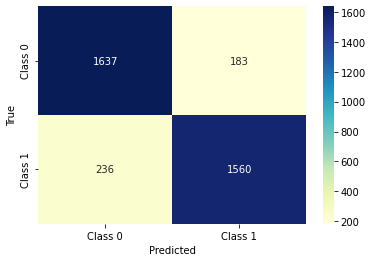

In [25]:
print(": The time and speed analysis of the Medium NN algorithm : ")
print(f'The training time of Medium NN is: {nn2_train_time} sec')
print(f'The prediction speed of the Medium NN is: {round(nn2_pred_time)} obs/sec')
print("=========================================================")
print(": The classifcation report of the Medium NN algorithm : ")

target_name = ['Class 0', 'Class 1']

print(classification_report(y_test_std, nn2_pred, target_names=target_name, zero_division=1.0))
print(f"Train Accuracy={train_percentage[1] * 100} %")
print(f"Validation set accuracy = {val_percentage[1] * 100} %")
print(f"Test Accuracy={test_percentage[1] * 100} %")
print("=========================================================")
print(": The confusion matrix of the Medium NN algorithm : ")
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt = 'd', xticklabels=target_name, yticklabels=target_name)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

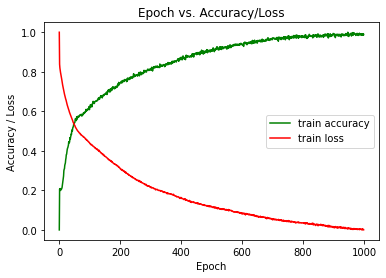

In [26]:
l = history2.history["loss"]
a = history2.history["accuracy"]
l_norm = np.array(l)
l_norm = (l_norm - l_norm.min()) / (l_norm.max() - l_norm.min())
l_norm = l_norm.tolist()
a_norm = np.array(a)
a_norm = (a_norm - a_norm.min()) / (a_norm.max() - a_norm.min())
a_norm = a_norm.tolist()
plt.plot(a_norm, label='train accuracy', color = "green")
plt.plot(l_norm, label='train loss', color  = "red")
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.title('Epoch vs. Accuracy/Loss')
plt.legend(loc = 'best')
plt.show()

__Wide Neural Networks__

In [32]:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(100, input_shape =  (10,), activation='relu'))
    model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer= "adam", metrics=['accuracy'])

    early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

    history3 = model.fit(X_train_std, y_train_std, epochs = 1000, callbacks = [early_stop])

Epoch 1/1000
545/545 [==============================] - 3s 4ms/step - loss: 0.5703 - accuracy: 0.6987
Epoch 2/1000
545/545 [==============================] - 3s 5ms/step - loss: 0.5432 - accuracy: 0.7137
Epoch 3/1000
545/545 [==============================] - 3s 5ms/step - loss: 0.5343 - accuracy: 0.7163
Epoch 4/1000
545/545 [==============================] - 3s 5ms/step - loss: 0.5283 - accuracy: 0.7147
Epoch 5/1000
545/545 [==============================] - 3s 5ms/step - loss: 0.5214 - accuracy: 0.7178
Epoch 6/1000
545/545 [==============================] - 3s 5ms/step - loss: 0.5132 - accuracy: 0.7203
Epoch 7/1000
545/545 [==============================] - 3s 5ms/step - loss: 0.5059 - accuracy: 0.7307
Epoch 8/1000
545/545 [==============================] - 3s 5ms/step - loss: 0.4981 - accuracy: 0.7400
Epoch 9/1000
545/545 [==============================] - 3s 5ms/step - loss: 0.4910 - accuracy: 0.7465
Epoch 10/1000
545/545 [==============================] - 3s 6ms/step - loss: 0.484

In [33]:
nn3_train_time = 16*60 
start = time.time()
nn3_pred_prob = model.predict(X_test_std)
nn3_pred = np.where(nn3_pred_prob >= 0.5, 1, 0)
end = time.time()
nn3_pred_time = X_test_std.shape[0] / (end - start) 

train_percentage = model.evaluate(X_train_std, y_train_std)
val_percentage = model.evaluate(X_val_std, y_val_std)
test_percentage = model.evaluate(X_test_std, y_test_std)

conf_mat = confusion_matrix(y_test_std, nn3_pred)

113/113 [==============================] - 0s 3ms/step - loss: 0.1110 - accuracy: 0.9607


: The time and speed analysis of the Wide NN algorithm : 
The training time of Wide NN is: 960 sec
The prediction speed of the Wide NN is: 7850 obs/sec
: The classifcation report of the Wide NN algorithm : 
              precision    recall  f1-score   support

     Class 0       0.99      0.93      0.96      1820
     Class 1       0.93      0.99      0.96      1796

    accuracy                           0.96      3616
   macro avg       0.96      0.96      0.96      3616
weighted avg       0.96      0.96      0.96      3616

Train Accuracy=96.00321650505066 %
Validation set accuracy = 95.57579755783081 %
Test Accuracy=96.07300758361816 %
: The confusion matrix of the Wide NN algorithm : 


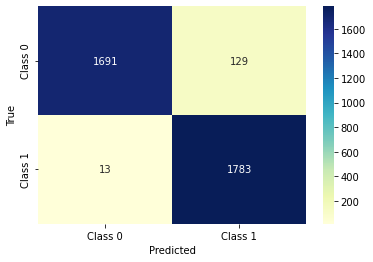

In [34]:
print(": The time and speed analysis of the Wide NN algorithm : ")
print(f'The training time of Wide NN is: {nn3_train_time} sec')
print(f'The prediction speed of the Wide NN is: {round(nn3_pred_time)} obs/sec')
print("=========================================================")
print(": The classifcation report of the Wide NN algorithm : ")

target_name = ['Class 0', 'Class 1']

print(classification_report(y_test_std, nn3_pred, target_names=target_name, zero_division=1.0))
print(f"Train Accuracy={train_percentage[1] * 100} %")
print(f"Validation set accuracy = {val_percentage[1] * 100} %")
print(f"Test Accuracy={test_percentage[1] * 100} %")
print("=========================================================")
print(": The confusion matrix of the Wide NN algorithm : ")
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt = 'd', xticklabels=target_name, yticklabels=target_name)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

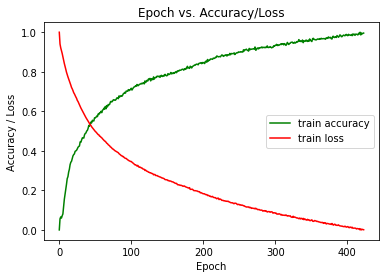

In [71]:
l = history3.history["loss"]
a = history3.history["accuracy"]
l_norm = np.array(l)
l_norm = (l_norm - l_norm.min()) / (l_norm.max() - l_norm.min())
l_norm = l_norm.tolist()
a_norm = np.array(a)
a_norm = (a_norm - a_norm.min()) / (a_norm.max() - a_norm.min())
a_norm = a_norm.tolist()
plt.plot(a_norm, label='train accuracy', color = "green")
plt.plot(l_norm, label='train loss', color  = "red")
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.title('Epoch vs. Accuracy/Loss')
plt.legend(loc = 'best')
plt.show()

__TriLayered Neural Networks__

In [27]:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(10, input_shape =  (10,), activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='relu'))
    model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer= "adam", metrics=['accuracy'])

    early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

    history4 = model.fit(X_train_std, y_train_std, epochs = 1000, callbacks = [early_stop])

Epoch 1/1000
545/545 [==============================] - 4s 5ms/step - loss: 0.6017 - accuracy: 0.6632
Epoch 2/1000
545/545 [==============================] - 3s 5ms/step - loss: 0.5491 - accuracy: 0.7113
Epoch 3/1000
545/545 [==============================] - 3s 6ms/step - loss: 0.5344 - accuracy: 0.7162
Epoch 4/1000
545/545 [==============================] - 2s 3ms/step - loss: 0.5254 - accuracy: 0.7195
Epoch 5/1000
545/545 [==============================] - 3s 5ms/step - loss: 0.5182 - accuracy: 0.7226
Epoch 6/1000
545/545 [==============================] - 3s 6ms/step - loss: 0.5121 - accuracy: 0.7267
Epoch 7/1000
545/545 [==============================] - 3s 5ms/step - loss: 0.5052 - accuracy: 0.7335
Epoch 8/1000
545/545 [==============================] - 3s 5ms/step - loss: 0.4990 - accuracy: 0.7407
Epoch 9/1000
545/545 [==============================] - 2s 3ms/step - loss: 0.4935 - accuracy: 0.7451
Epoch 10/1000
545/545 [==============================] - 2s 3ms/step - loss: 0.488

In [28]:
nn4_train_time = 13*60 
start = time.time()
nn4_pred_prob = model.predict(X_test_std)
nn4_pred = np.where(nn4_pred_prob >= 0.5, 1, 0)
end = time.time()
nn4_pred_time = X_test_std.shape[0] / (end - start) 

train_percentage = model.evaluate(X_train_std, y_train_std)
val_percentage = model.evaluate(X_val_std, y_val_std)
test_percentage = model.evaluate(X_test_std, y_test_std)

conf_mat = confusion_matrix(y_test_std, nn4_pred)

113/113 [==============================] - 0s 3ms/step - loss: 0.2009 - accuracy: 0.9231


: The time and speed analysis of the Tri-Layered NN algorithm : 
The training time of Tri-Layered NN is: 780 sec
The prediction speed of the Tri-Layered NN is: 6867 obs/sec
: The classifcation report of the Tri-Layered NN algorithm : 
              precision    recall  f1-score   support

     Class 0       0.97      0.88      0.92      1820
     Class 1       0.89      0.97      0.93      1796

    accuracy                           0.92      3616
   macro avg       0.93      0.92      0.92      3616
weighted avg       0.93      0.92      0.92      3616

Train Accuracy=91.7365312576294 %
Validation set accuracy = 91.31425023078918 %
Test Accuracy=92.31194853782654 %
: The confusion matrix of the Tri-Layered NN algorithm : 


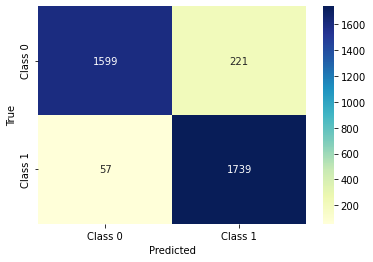

In [29]:
print(": The time and speed analysis of the Tri-Layered NN algorithm : ")
print(f'The training time of Tri-Layered NN is: {nn4_train_time} sec')
print(f'The prediction speed of the Tri-Layered NN is: {round(nn4_pred_time)} obs/sec')
print("=========================================================")
print(": The classifcation report of the Tri-Layered NN algorithm : ")

target_name = ['Class 0', 'Class 1']

print(classification_report(y_test_std, nn4_pred, target_names=target_name, zero_division=1.0))
print(f"Train Accuracy={train_percentage[1] * 100} %")
print(f"Validation set accuracy = {val_percentage[1] * 100} %")
print(f"Test Accuracy={test_percentage[1] * 100} %")
print("=========================================================")
print(": The confusion matrix of the Tri-Layered NN algorithm : ")
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt = 'd', xticklabels=target_name, yticklabels=target_name)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

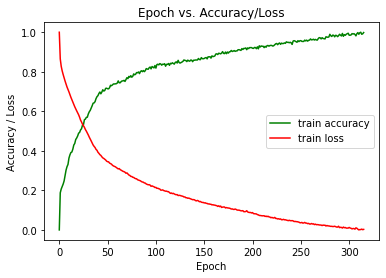

In [30]:
l = history4.history["loss"]
a = history4.history["accuracy"]
l_norm = np.array(l)
l_norm = (l_norm - l_norm.min()) / (l_norm.max() - l_norm.min())
l_norm = l_norm.tolist()
a_norm = np.array(a)
a_norm = (a_norm - a_norm.min()) / (a_norm.max() - a_norm.min())
a_norm = a_norm.tolist()
plt.plot(a_norm, label='train accuracy', color = "green")
plt.plot(l_norm, label='train loss', color  = "red")
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.title('Epoch vs. Accuracy/Loss')
plt.legend(loc = 'best')
plt.show()

__Four Layered Neural Networks__

_narrow four layered NN_

In [50]:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(10, input_shape =  (10,), activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='relu'))
    model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer= "adam", metrics=['accuracy'])

    early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

    history5 = model.fit(X_train_std, y_train_std, epochs = 1000, callbacks = [early_stop])

Epoch 1/1000
545/545 [==============================] - 6s 6ms/step - loss: 0.5829 - accuracy: 0.6804
Epoch 2/1000
545/545 [==============================] - 3s 6ms/step - loss: 0.5383 - accuracy: 0.7243
Epoch 3/1000
545/545 [==============================] - 3s 5ms/step - loss: 0.5255 - accuracy: 0.7279
Epoch 4/1000
545/545 [==============================] - 2s 4ms/step - loss: 0.5146 - accuracy: 0.7296
Epoch 5/1000
545/545 [==============================] - 3s 5ms/step - loss: 0.5037 - accuracy: 0.7350
Epoch 6/1000
545/545 [==============================] - 3s 5ms/step - loss: 0.4899 - accuracy: 0.7443
Epoch 7/1000
545/545 [==============================] - 3s 5ms/step - loss: 0.4757 - accuracy: 0.7523
Epoch 8/1000
545/545 [==============================] - 3s 5ms/step - loss: 0.4649 - accuracy: 0.7612
Epoch 9/1000
545/545 [==============================] - 3s 5ms/step - loss: 0.4545 - accuracy: 0.7645
Epoch 10/1000
545/545 [==============================] - 3s 5ms/step - loss: 0.444

In [51]:
nn5_train_time = 15*60 
start = time.time()
nn5_pred_prob = model.predict(X_test_std)
nn5_pred = np.where(nn5_pred_prob >= 0.5, 1, 0)
end = time.time()
nn5_pred_time = X_test_std.shape[0] / (end - start) 

train_percentage = model.evaluate(X_train_std, y_train_std)
val_percentage = model.evaluate(X_val_std, y_val_std)
test_percentage = model.evaluate(X_test_std, y_test_std)

conf_mat = confusion_matrix(y_test_std, nn5_pred)

113/113 [==============================] - 1s 7ms/step - loss: 0.1975 - accuracy: 0.9134


: The time and speed analysis of the Narrow-4-Layered NN algorithm : 
The training time of Narrow-4-Layered NN is: 900 sec
The prediction speed of the Narrow-4-Layered NN is: 5107 obs/sec
: The classifcation report of the Narrow-4-Layered NN algorithm : 
              precision    recall  f1-score   support

     Class 0       0.94      0.88      0.91      1820
     Class 1       0.89      0.95      0.92      1796

    accuracy                           0.91      3616
   macro avg       0.92      0.91      0.91      3616
weighted avg       0.92      0.91      0.91      3616

Train Accuracy=91.14505648612976 %
Validation set accuracy = 89.49251770973206 %
Test Accuracy=91.34402871131897 %
: The confusion matrix of the Narrow-4-Layered NN algorithm : 


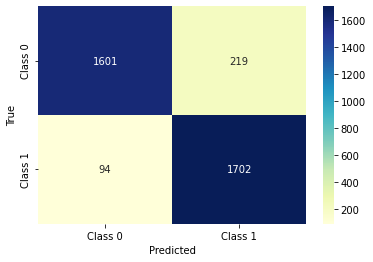

In [52]:
print(": The time and speed analysis of the Narrow-4-Layered NN algorithm : ")
print(f'The training time of Narrow-4-Layered NN is: {nn5_train_time} sec')
print(f'The prediction speed of the Narrow-4-Layered NN is: {round(nn5_pred_time)} obs/sec')
print("=========================================================")
print(": The classifcation report of the Narrow-4-Layered NN algorithm : ")

target_name = ['Class 0', 'Class 1']

print(classification_report(y_test_std, nn5_pred, target_names=target_name, zero_division=1.0))
print(f"Train Accuracy={train_percentage[1] * 100} %")
print(f"Validation set accuracy = {val_percentage[1] * 100} %")
print(f"Test Accuracy={test_percentage[1] * 100} %")
print("=========================================================")
print(": The confusion matrix of the Narrow-4-Layered NN algorithm : ")
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt = 'd', xticklabels=target_name, yticklabels=target_name)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

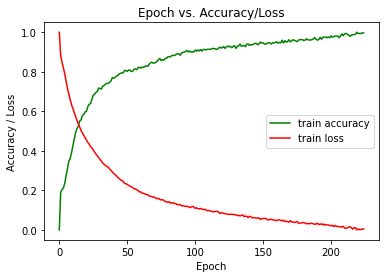

In [69]:
l = history5.history["loss"]
a = history5.history["accuracy"]
l_norm = np.array(l)
l_norm = (l_norm - l_norm.min()) / (l_norm.max() - l_norm.min())
l_norm = l_norm.tolist()
a_norm = np.array(a)
a_norm = (a_norm - a_norm.min()) / (a_norm.max() - a_norm.min())
a_norm = a_norm.tolist()
plt.plot(a_norm, label='train accuracy', color = "green")
plt.plot(l_norm, label='train loss', color  = "red")
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.title('Epoch vs. Accuracy/Loss')
plt.legend(loc = 'best')
plt.show()

_Wide Four layered NN_

In [27]:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(100, input_shape =  (10,), activation='relu'))
    model.add(tf.keras.layers.Dense(50, activation='relu'))
    model.add(tf.keras.layers.Dense(25, activation='relu'))
    model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer= "adam", metrics=['accuracy'])

    early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

    history6 = model.fit(X_train_std, y_train_std, epochs = 1000, callbacks = [early_stop])

Epoch 1/1000
531/531 [==============================] - 4s 5ms/step - loss: 0.5482 - accuracy: 0.7083
Epoch 2/1000
531/531 [==============================] - 3s 5ms/step - loss: 0.4950 - accuracy: 0.7364
Epoch 3/1000
531/531 [==============================] - 3s 5ms/step - loss: 0.4524 - accuracy: 0.7699
Epoch 4/1000
531/531 [==============================] - 3s 5ms/step - loss: 0.4100 - accuracy: 0.8013
Epoch 5/1000
531/531 [==============================] - 3s 6ms/step - loss: 0.3665 - accuracy: 0.8276
Epoch 6/1000
531/531 [==============================] - 3s 5ms/step - loss: 0.3260 - accuracy: 0.8528
Epoch 7/1000
531/531 [==============================] - 3s 6ms/step - loss: 0.2853 - accuracy: 0.8769
Epoch 8/1000
531/531 [==============================] - 3s 5ms/step - loss: 0.2566 - accuracy: 0.8915
Epoch 9/1000
531/531 [==============================] - 3s 5ms/step - loss: 0.2296 - accuracy: 0.9049
Epoch 10/1000
531/531 [==============================] - 3s 5ms/step - loss: 0.211

In [28]:
nn6_train_time = 3.4*60 
start = time.time()
nn6_pred_prob = model.predict(X_test_std)
nn6_pred = np.where(nn6_pred_prob >= 0.5, 1, 0)
end = time.time()
nn6_pred_time = X_test_std.shape[0] / (end - start) 

train_percentage = model.evaluate(X_train_std, y_train_std)
val_percentage = model.evaluate(X_val_std, y_val_std)
test_percentage = model.evaluate(X_test_std, y_test_std)

conf_mat = confusion_matrix(y_test_std, nn6_pred)

111/111 [==============================] - 0s 2ms/step - loss: 0.0953 - accuracy: 0.9730


: The time and speed analysis of the Wide-4-Layered NN algorithm : 
The training time of Wide-4-Layered NN is: 204.0 sec
The prediction speed of the Wide-4-Layered NN is: 4232 obs/sec
: The classifcation report of the Wide-4-Layered NN algorithm : 
              precision    recall  f1-score   support

     Class 0       0.99      0.95      0.97      1740
     Class 1       0.96      0.99      0.97      1785

    accuracy                           0.97      3525
   macro avg       0.97      0.97      0.97      3525
weighted avg       0.97      0.97      0.97      3525

Train Accuracy=97.84426689147949 %
Validation set accuracy = 97.46413230895996 %
Test Accuracy=97.30496406555176 %
: The confusion matrix of the Wide-4-Layered NN algorithm : 


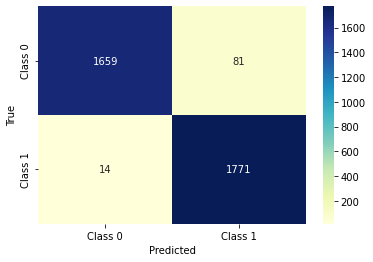

In [29]:
print(": The time and speed analysis of the Wide-4-Layered NN algorithm : ")
print(f'The training time of Wide-4-Layered NN is: {nn6_train_time} sec')
print(f'The prediction speed of the Wide-4-Layered NN is: {round(nn6_pred_time)} obs/sec')
print("=========================================================")
print(": The classifcation report of the Wide-4-Layered NN algorithm : ")

target_name = ['Class 0', 'Class 1']

print(classification_report(y_test_std, nn6_pred, target_names=target_name, zero_division=1.0))
print(f"Train Accuracy={train_percentage[1] * 100} %")
print(f"Validation set accuracy = {val_percentage[1] * 100} %")
print(f"Test Accuracy={test_percentage[1] * 100} %")
print("=========================================================")
print(": The confusion matrix of the Wide-4-Layered NN algorithm : ")
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt = 'd', xticklabels=target_name, yticklabels=target_name)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [63]:
l = history6.history["loss"]
a = history6.history["accuracy"]
l_norm = np.array(l)
l_norm = (l_norm - l_norm.min()) / (l_norm.max() - l_norm.min())
l_norm = l_norm.tolist()
a_norm = np.array(a)
a_norm = (a_norm - a_norm.min()) / (a_norm.max() - a_norm.min())
a_norm = a_norm.tolist()

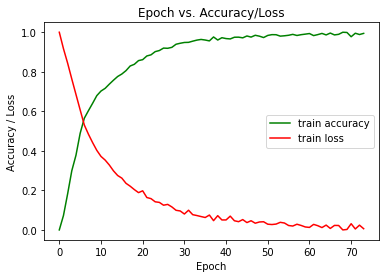

In [67]:
plt.plot(a_norm, label='train accuracy', color = "green")
plt.plot(l_norm, label='train loss', color  = "red")
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.title('Epoch vs. Accuracy/Loss')
plt.legend(loc = 'best')
plt.show()

__Six Layered Neural Networks__

In [24]:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(100, input_shape =  (10,), activation='relu'))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.Dense(4, activation='relu'))
    model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer= "adam", metrics=['accuracy'])

    early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

    history7 = model.fit(X_train_std, y_train_std, epochs = 1000, callbacks = [early_stop])

Epoch 1/1000
531/531 [==============================] - 6s 6ms/step - loss: 0.5390 - accuracy: 0.7100
Epoch 2/1000
531/531 [==============================] - 3s 6ms/step - loss: 0.4724 - accuracy: 0.7599
Epoch 3/1000
531/531 [==============================] - 3s 6ms/step - loss: 0.4274 - accuracy: 0.7881
Epoch 4/1000
531/531 [==============================] - 3s 6ms/step - loss: 0.3696 - accuracy: 0.8248
Epoch 5/1000
531/531 [==============================] - 3s 6ms/step - loss: 0.3182 - accuracy: 0.8566
Epoch 6/1000
531/531 [==============================] - 3s 6ms/step - loss: 0.2758 - accuracy: 0.8785
Epoch 7/1000
531/531 [==============================] - 3s 6ms/step - loss: 0.2819 - accuracy: 0.8866
Epoch 8/1000
531/531 [==============================] - 3s 6ms/step - loss: 0.2291 - accuracy: 0.9057
Epoch 9/1000
531/531 [==============================] - 3s 6ms/step - loss: 0.2060 - accuracy: 0.9149
Epoch 10/1000
531/531 [==============================] - 3s 6ms/step - loss: 0.184

In [25]:
nn7_train_time = 2.5*60 
start = time.time()
nn7_pred_prob = model.predict(X_test_std)
nn7_pred = np.where(nn7_pred_prob >= 0.5, 1, 0)
end = time.time()
nn7_pred_time = X_test_std.shape[0] / (end - start) 

train_percentage = model.evaluate(X_train_std, y_train_std)
val_percentage = model.evaluate(X_val_std, y_val_std)
test_percentage = model.evaluate(X_test_std, y_test_std)

conf_mat = confusion_matrix(y_test_std, nn7_pred)

111/111 [==============================] - 1s 6ms/step - loss: 0.0578 - accuracy: 0.9813


: The time and speed analysis of the Six-Layered NN algorithm : 
The training time of Six-Layered NN is: 150.0 sec
The prediction speed of the Six-Layered NN is: 4562 obs/sec
: The classifcation report of the Six-Layered NN algorithm : 
              precision    recall  f1-score   support

     Class 0       0.99      0.98      0.98      1740
     Class 1       0.98      0.99      0.98      1785

    accuracy                           0.98      3525
   macro avg       0.98      0.98      0.98      3525
weighted avg       0.98      0.98      0.98      3525

Train Accuracy=98.78666400909424 %
Validation set accuracy = 98.39839935302734 %
Test Accuracy=98.12765717506409 %
: The confusion matrix of the Six-Layered NN algorithm : 


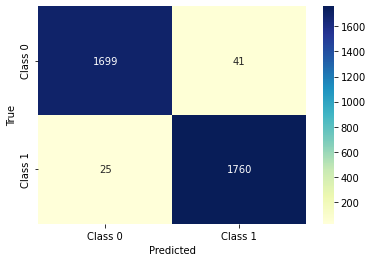

In [26]:
print(": The time and speed analysis of the Six-Layered NN algorithm : ")
print(f'The training time of Six-Layered NN is: {nn7_train_time} sec')
print(f'The prediction speed of the Six-Layered NN is: {round(nn7_pred_time)} obs/sec')
print("=========================================================")
print(": The classifcation report of the Six-Layered NN algorithm : ")

target_name = ['Class 0', 'Class 1']

print(classification_report(y_test_std, nn7_pred, target_names=target_name, zero_division=1.0))
print(f"Train Accuracy={train_percentage[1] * 100} %")
print(f"Validation set accuracy = {val_percentage[1] * 100} %")
print(f"Test Accuracy={test_percentage[1] * 100} %")
print("=========================================================")
print(": The confusion matrix of the Six-Layered NN algorithm : ")
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt = 'd', xticklabels=target_name, yticklabels=target_name)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

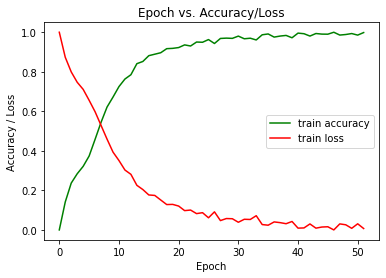

In [68]:
l = history7.history["loss"]
a = history7.history["accuracy"]
l_norm = np.array(l)
l_norm = (l_norm - l_norm.min()) / (l_norm.max() - l_norm.min())
l_norm = l_norm.tolist()
a_norm = np.array(a)
a_norm = (a_norm - a_norm.min()) / (a_norm.max() - a_norm.min())
a_norm = a_norm.tolist()
plt.plot(a_norm, label='train accuracy', color = "green")
plt.plot(l_norm, label='train loss', color  = "red")
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.title('Epoch vs. Accuracy/Loss')
plt.legend(loc = 'best')
plt.show()

### Boosting 

In [38]:
model = xgb.XGBClassifier(reg_lambda = 50)
start = time.time()
model.fit(X_train_std, y_train_std)
end = time.time()

In [39]:
predictions_train = model.predict(X_train_std)
train_percentage = model.score(X_train_std,y_train_std)

predictions_val = model.predict(X_val_std)
val_percentage = model.score(X_val_std, y_val_std)

start1 = time.time()
predictions_test = model.predict(X_test_std)
end1 = time.time()
boost_time_pred = X_test_std.shape[0] / (end1 -  start1)

test_percentage = model.score(X_test_std, y_test_std)

boost_time_train = end - start 

: The time and speed analysis of the XGboost algorithm : 
The training time of XGboost is: 0.6641688346862793 sec
The prediction speed of the XGboost is: 434966 obs/sec
: The classifcation report of the XGboost algorithm : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1740
           1       1.00      1.00      1.00      1785

    accuracy                           1.00      3525
   macro avg       1.00      1.00      1.00      3525
weighted avg       1.00      1.00      1.00      3525

Train Accuracy=99.95288019790317 %
Validation set accuracy = 99.93326659993326 %
Test Accuracy=99.94326241134752 %
: The confusion matrix of the XGboost algorithm : 


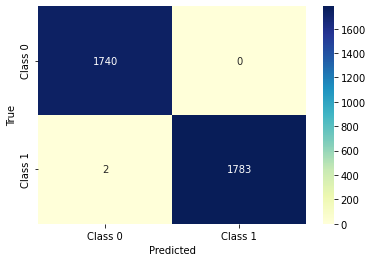

In [40]:
print(": The time and speed analysis of the XGboost algorithm : ")
print(f'The training time of XGboost is: {boost_time_train} sec')
print(f'The prediction speed of the XGboost is: {round(boost_time_pred)} obs/sec')
print("=========================================================")
print(": The classifcation report of the XGboost algorithm : ")
print(classification_report(y_test_std, predictions_test))
print(f"Train Accuracy={train_percentage*100} %")
print(f"Validation set accuracy = {val_percentage*100} %")
print(f"Test Accuracy={test_percentage*100} %")
print("=========================================================")
print(": The confusion matrix of the XGboost algorithm : ")
conf_mat = confusion_matrix(y_test_std, predictions_test)
target_name = ['Class 0', 'Class 1']
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt = 'd', xticklabels=target_name, yticklabels=target_name)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [19]:
save_model(model, "XGBoost_L2")

In [41]:
model2 = xgb.XGBClassifier(reg_alpha = 50)
start = time.time()
model2.fit(X_train_std, y_train_std)
end = time.time()

In [42]:
predictions_train = model2.predict(X_train_std)
train_percentage = model2.score(X_train_std,y_train_std)

predictions_val = model2.predict(X_val_std)
val_percentage = model2.score(X_val_std, y_val_std)

start1 = time.time()
predictions_test = model2.predict(X_test_std)
end1 = time.time()
boost_time_pred = X_test_std.shape[0] / (end1 -  start1)

test_percentage = model2.score(X_test_std, y_test_std)

boost_time_train = end - start 

: The time and speed analysis of the XGboost algorithm : 
The training time of XGboost is: 0.3491647243499756 sec
The prediction speed of the XGboost is: 439857 obs/sec
: The classifcation report of the XGboost algorithm : 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1740
           1       0.98      1.00      0.99      1785

    accuracy                           0.99      3525
   macro avg       0.99      0.99      0.99      3525
weighted avg       0.99      0.99      0.99      3525

Train Accuracy=99.10472376016021 %
Validation set accuracy = 98.86553219886554 %
Test Accuracy=98.97872340425532 %
: The confusion matrix of the XGboost algorithm : 


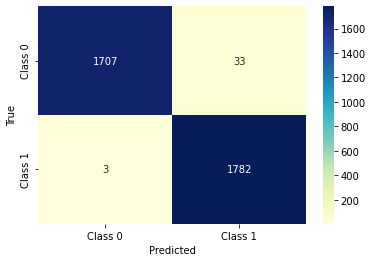

In [43]:
print(": The time and speed analysis of the XGboost algorithm : ")
print(f'The training time of XGboost is: {boost_time_train} sec')
print(f'The prediction speed of the XGboost is: {round(boost_time_pred)} obs/sec')
print("=========================================================")
print(": The classifcation report of the XGboost algorithm : ")
print(classification_report(y_test_std, predictions_test))
print(f"Train Accuracy={train_percentage*100} %")
print(f"Validation set accuracy = {val_percentage*100} %")
print(f"Test Accuracy={test_percentage*100} %")
print("=========================================================")
print(": The confusion matrix of the XGboost algorithm : ")
conf_mat = confusion_matrix(y_test_std, predictions_test)
target_name = ['Class 0', 'Class 1']
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt = 'd', xticklabels=target_name, yticklabels=target_name)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [23]:
save_model(model2, "XGBoost_L1")

In [17]:
fpr_boosting, tpr_boosting, thresholds = roc_curve(y_test_std, predictions_test)
auc_boosting = auc(fpr_boosting, tpr_boosting)

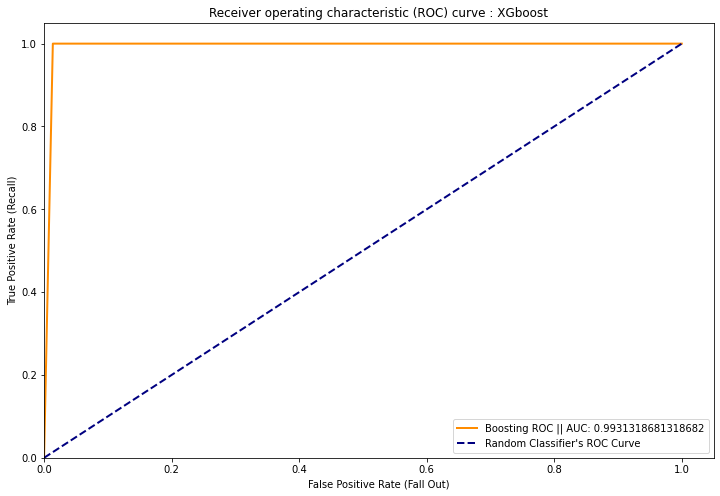

In [18]:
plt.figure(figsize=(12, 8))
plt.plot(fpr_boosting, tpr_boosting, color='darkorange', lw=2, label=f'Boosting ROC || AUC: {round(auc_boosting)}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label = "Random Classifier's ROC Curve")
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Fall Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic (ROC) curve : XGboost')
plt.legend(loc="lower right")
plt.show()

# Comparative Study  <a class="anchor" id="12"></a>

In [5]:
neural_network_report = {

    "Accuracy":{
        "narrow_nn": 80.17,
        "medium_nn": 88.41,
        "wide_nn": 96.07,
        "trilayered_nn": 92.31,
        "narrow_4layered_nn": 91.34,
        "wide_4layered_nn": 99.22,
        "sixlayered_nn": 99.61,
    },
    "f1_score":{
        "narrow_nn": 0.80,
        "medium_nn": 0.88,
        "wide_nn": 0.96,
        "trilayered_nn": 0.92,
        "narrow_4layered_nn": 0.91,
        "wide_4layered_nn": 0.99,
        "sixlayered_nn": 1.00,
    },
    "training_time":{
        "narrow_nn": 2400,
        "medium_nn": 2160,
        "wide_nn": 960,
        "tri_nn": 780,
        "4layer_nn": 204,
        "6layer_nn": 150,
    },
    "prediction speed":{
        "narrow_nn": 4871,
        "medium_nn": 6373,
        "wide_nn": 7850,
        "trilayered_nn": 6867,
        "narrow_4layered_nn": 5107,
        "wide_4layered_nn": 6861,
        "sixlayered_nn": 6676,
    }

}

svm_report = {

    "Accuracy":{
        "linear_svm":71.48,
        "quadratic_svm": 71.48,
        "cubic_svm": 78.31, 
        "fine_gauss_svm": 90.90,
        "medium_gauss_svm": 96.59,
        "coarse_gauss_svm": 96.04,
    },
    "f1_score":{
        "linear_svm":0.71,
        "quadratic_svm": 0.78,
        "cubic_svm": 0.78,
        "fine_gauss_svm": 0.91, 
        "medium_gauss_svm": 0.97,
        "coarse_gauss_svm": 0.96,
    },
    "training_time":{
        "lin_svm":9.26,
        "quad_svm": 63.38,
        "cubic_svm": 516.09,
        "fine_gauss": 28.67,
        "medium_gauss": 61.25,
        "coarse_gauss": 61.11,
    },
    "prediction speed":{
        "linear_svm":3568,
        "quadratic_svm": 3333,
        "cubic_svm": 3833, 
        "fine_gauss_svm": 1190,
        "medium_gauss_svm": 1028,
        "coarse_gauss_svm": 636,
    }

}

boosting_report = {

    "Accuracy":{
        "xgboost": 100,
    },
    "f1_score":{
        "xgboost": 1.00,
    },
    "training_time":{
        "xgboost_L1": 0.32,
        "xgboost_L2": 0.65,
    },
    "prediction speed":{
        "xgboost": 452302,
    }

}

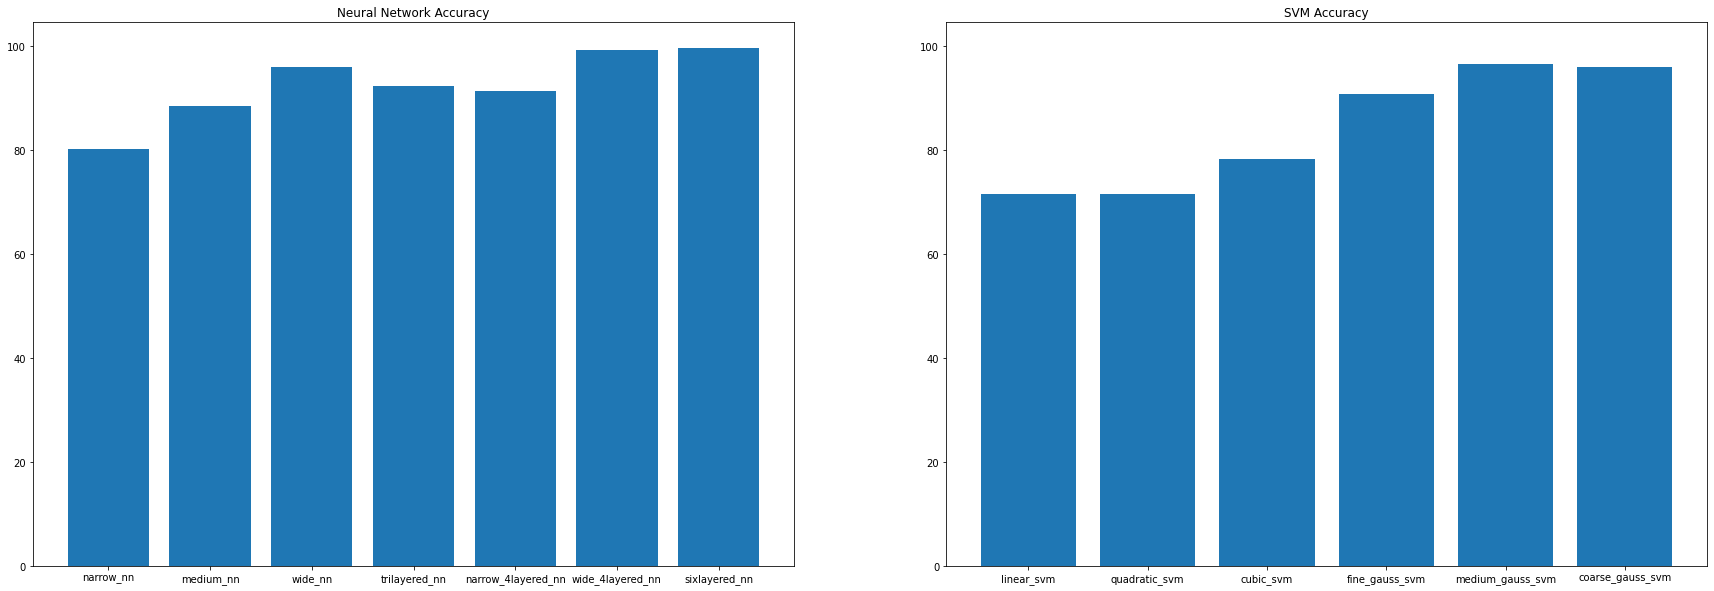

In [78]:
# Extract the accuracy values from the dictionaries
nn_acc = neural_network_report["Accuracy"].values()
svm_acc = svm_report["Accuracy"].values()

# Create the bar graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
ax1.bar(neural_network_report["Accuracy"].keys(), nn_acc)
ax1.set_title("Neural Network Accuracy")
ax2.bar(svm_report["Accuracy"].keys(), svm_acc)
ax2.set_title("SVM Accuracy")

# Set y-axis limits to ensure consistent scaling of the graphs
y_max = max(max(nn_acc), max(svm_acc))
plt.ylim([0, y_max + 5])

plt.show()

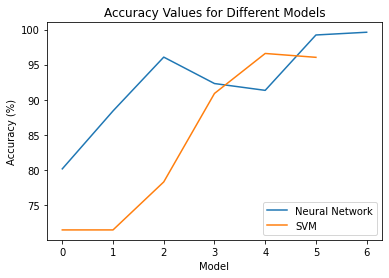

In [74]:
plt.plot(list(neural_network_report["Accuracy"].values()), label="Neural Network")
plt.plot(list(svm_report["Accuracy"].values()), label="SVM")
plt.legend()
plt.title("Accuracy Values for Different Models")
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.show()

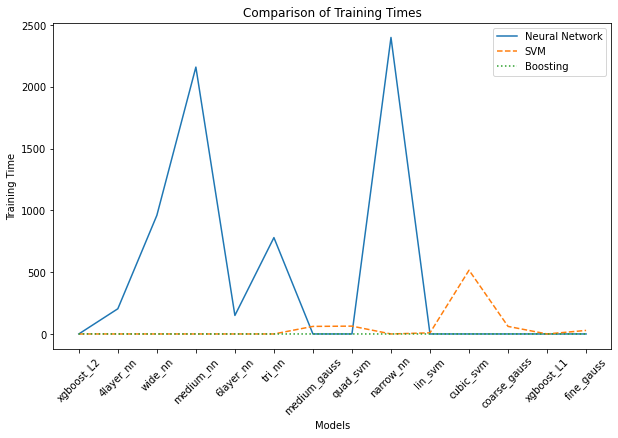

In [10]:
# Get the training times from the dictionaries
nn_training_times = neural_network_report["training_time"]
svm_training_times = svm_report["training_time"]
boosting_training_times = boosting_report["training_time"]

# Prepare the x-axis labels
models = list(set(nn_training_times.keys()) | set(svm_training_times.keys()) | set(boosting_training_times.keys()))

# Prepare the y-axis data
nn_times = [nn_training_times.get(model, 0) for model in models]
svm_times = [svm_training_times.get(model, 0) for model in models]
boosting_times = [boosting_training_times.get(model, 0) for model in models]

# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust the width and height as desired

# Generate the dotted line graph
plt.plot(models, nn_times, linestyle='-', label='Neural Network')
plt.plot(models, svm_times, linestyle='--', label='SVM')
plt.plot(models, boosting_times, linestyle=':', label='Boosting')

# Set the labels and title
plt.xlabel('Models')
plt.ylabel('Training Time')
plt.title('Comparison of Training Times')

# Add a legend
plt.legend()

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the graph
plt.show()